## Imports

In [3]:
import pandas as pd
# import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import analysis_util
import tqdm
from scipy.stats import pearsonr, spearmanr
import numpy as np
import plotly.express as px
import datetime

import nltk 
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Data

In [4]:
subreddits = ['FourSentenceStories','Trump666','GraphTheory','jazznoir','indoorbouldering','kiwi_bird','DTU']
period = '2015-01-01-2022-01-01'

df_post_dict = {}
df_comment_dict = {}
df_all_nodes_dict = {}
G_dict = {}
G_di_dict = {}
df_authors_dict = {}
df_comment_post_dict = {}


for subreddit in subreddits:
    print(subreddit)
    path_post='../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_posts.csv"
    path_comment = '../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_comments.csv"
    path_awards = '../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_awards.csv"
    path_awards_comments = '../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_awards_comments.csv"
    
    df_comments=analysis_util.read_comments(path_comment,path_awards_comments)
    df_post=analysis_util.read_posts(path_post,path_awards)
    df_all_nodes=analysis_util.get_all_nodes(df_post,df_comments)    
    G_di = analysis_util.get_DiGraph(df_post,df_comments,df_all_nodes)
    G=analysis_util.get_graph(df_post,df_comments,df_all_nodes)
    G_big=analysis_util.get_biggest_component(G)    
    df_comment_post = analysis_util.get_comment_post_date(df_comments,df_post)
    df_authors = analysis_util.get_authors(G,df_all_nodes,df_comments,df_post,df_comment_post)
    
    df_comment_post_dict[subreddit] = df_comment_post
    df_comment_dict[subreddit] = df_comments
    df_post_dict[subreddit] = df_post
    df_all_nodes_dict[subreddit] = df_all_nodes
    G_dict[subreddit] = G_big
    df_authors_dict[subreddit] = df_authors
    G_di_dict[subreddit] = G_di
    print('')

FourSentenceStories
Removed 0.008264462809917328 of the rows

Trump666
Removed 0.023008849557522026 of the rows

GraphTheory
Removed 0.046391752577319645 of the rows

jazznoir
Removed 0.056192660550458795 of the rows

indoorbouldering
Removed 0.013580246913580174 of the rows

kiwi_bird
Removed 0.01412429378531077 of the rows

DTU
Removed 0.02263374485596703 of the rows



In [5]:
# def add_awards_to_post(subreddit):
#     period = '2015-01-01-2022-01-01'
#     df_awards = pd.read_csv('../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_awards.csv").set_index('id')
#     df_post=df_post_dict[subreddit].set_index('id')
#     df_post['N_awards'] = df_awards['n_awards']
#     df_post_dict[subreddit] = df_post.reset_index()

# for subreddit in subreddits:
#     add_awards_to_post(subreddit)
# # add_awards_to_post('DTU')

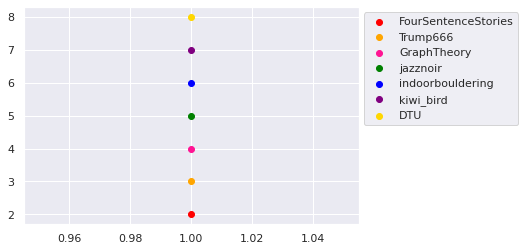

In [6]:
# a color for each subreddit in a dictionary
color_dict = {'FourSentenceStories':'#FF0000','Trump666':'#FFA500','GraphTheory':'#FF1493','jazznoir':'#008000','indoorbouldering':'#0000FF','kiwi_bird':'#800080','DTU':'#FFD700'}

# plot each color
i = 1
for subreddit in subreddits:
    i = 1 + i
    plt.scatter([1], [i], c=color_dict[subreddit], label=subreddit)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# # change grahtheory color to dark baby red
color_dict['GraphTheory'] = '#FF1493'

# Plotting Networks

TypeError: set_facecolor() got an unexpected keyword argument 'alpha'

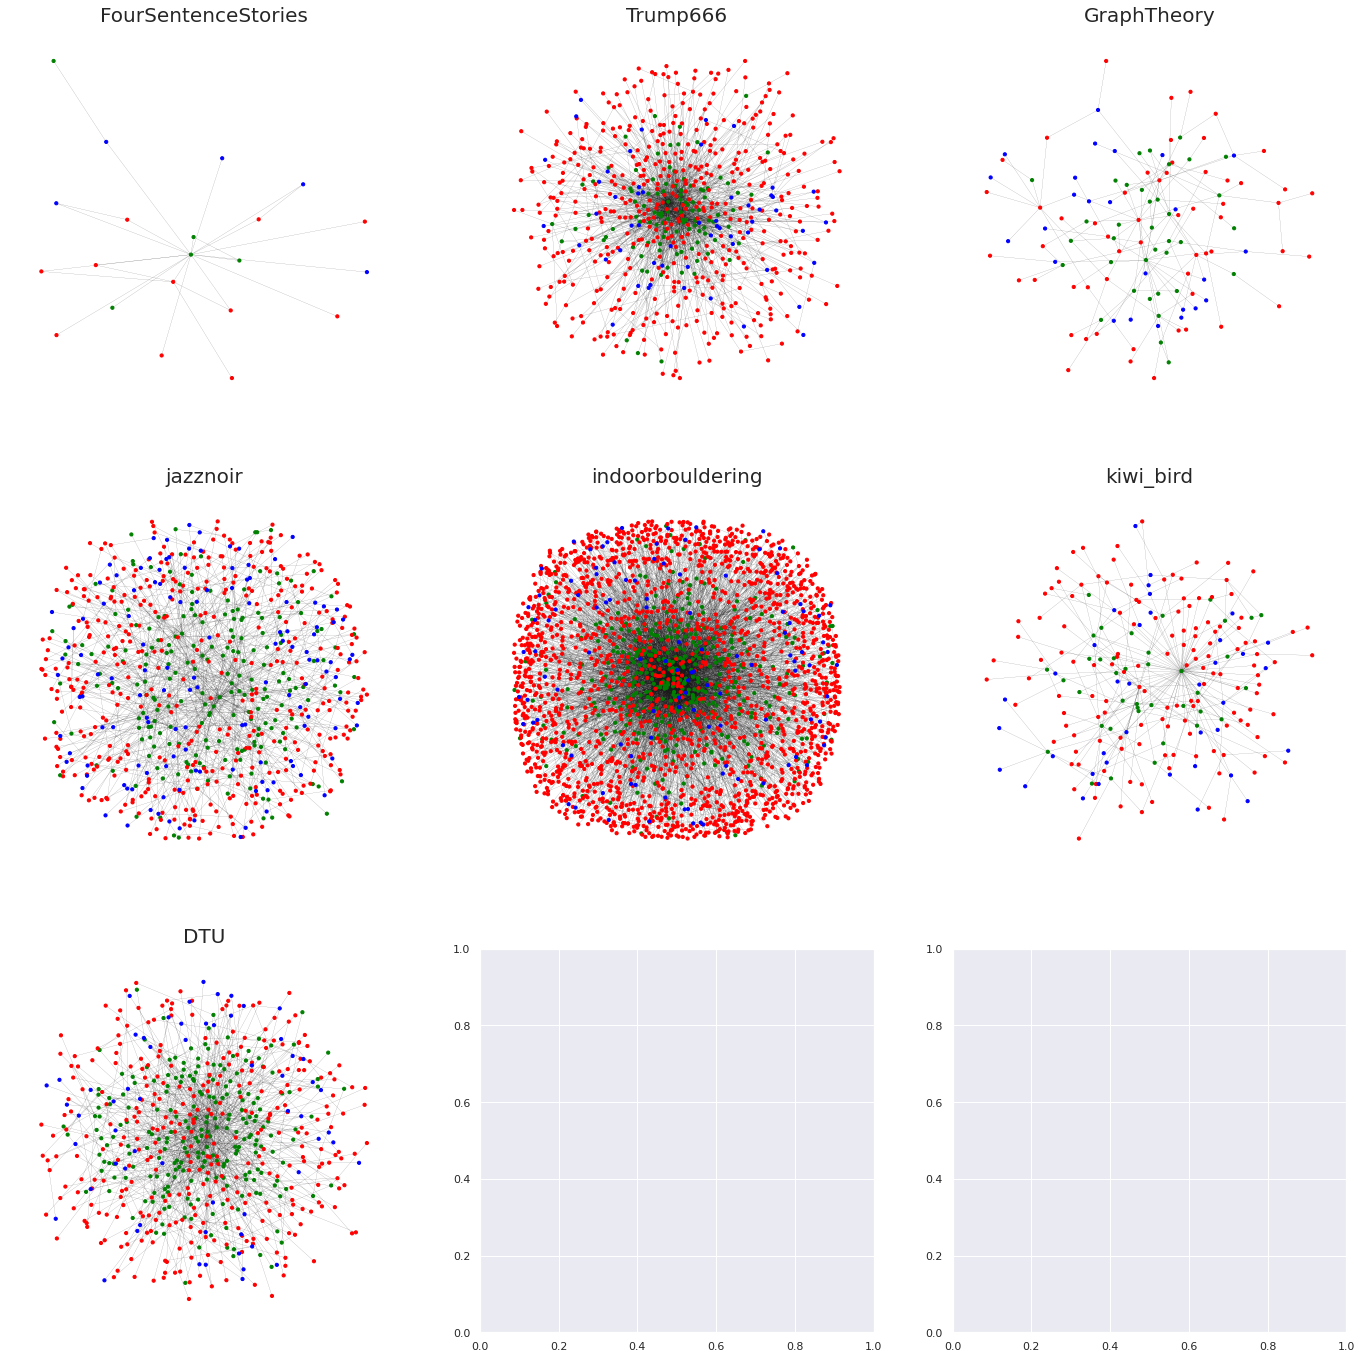

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(8*3,8*3))
axs = axs.flatten()
for i,subreddit in enumerate(subreddits):
    color_map = []
    for node in G_dict[subreddit]:
        if type(node) == float: print(node)
        if G_dict[subreddit].nodes[node]['type'] == 'both': color_map.append('green')
        elif G_dict[subreddit].nodes[node]['type'] == 'commenter': color_map.append('red')
        else: color_map.append('blue')

    nx.draw(G_dict[subreddit], 
            node_color=color_map, 
            with_labels=False, 
            ax=axs[i],
            pos=nx.spring_layout(G_dict[subreddit], k=0.15, iterations=20), 
            node_size=10,
            width=.1,
            alpha=1)

    axs[i].set_title(subreddit,fontsize=20)

# add background color
fig.patch.set_facecolor(color=color_dict[subreddit],alpha=0.3)
plt.show()

plt.tight_layout()
plt.show()

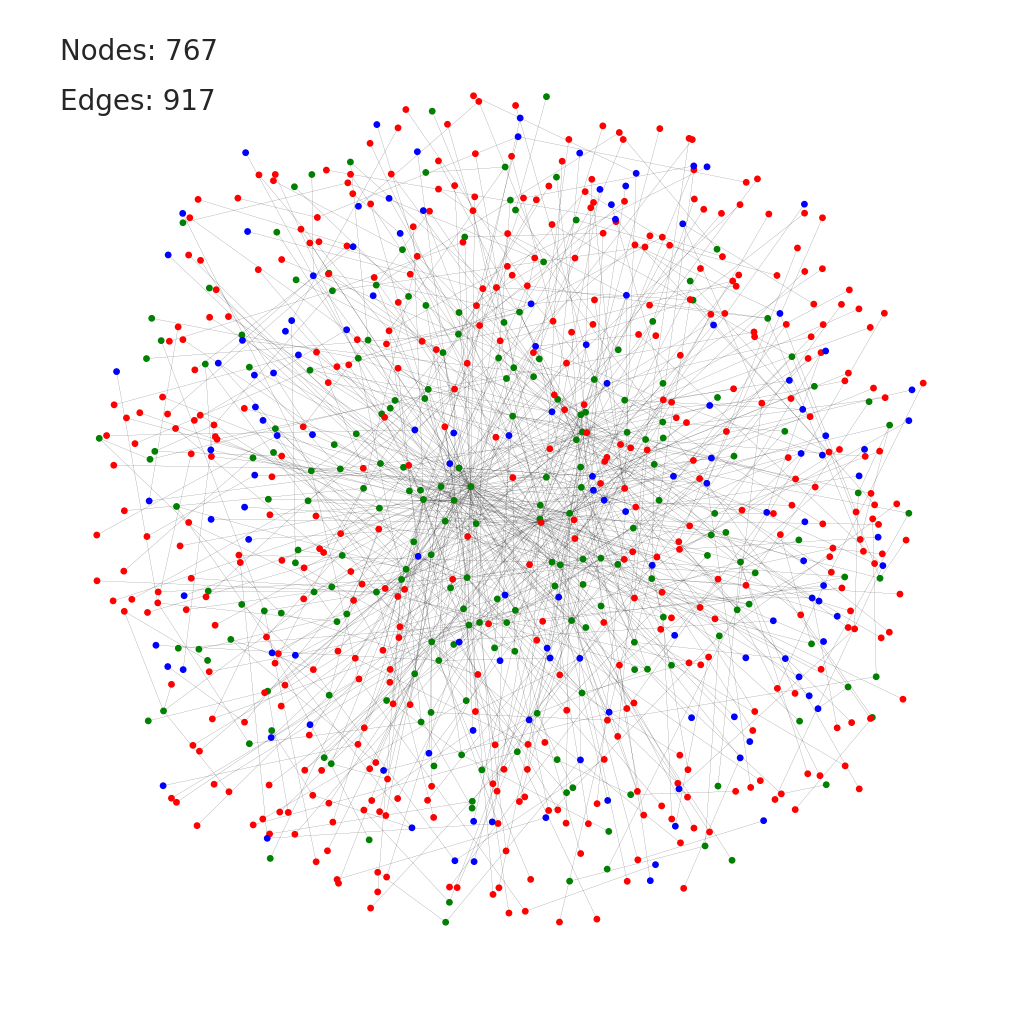

In [11]:
def plot_network(subreddit):
    plt.figure(figsize=(10,10),dpi=100)
    color_map = []
    for node in G_dict[subreddit]:
        if type(node) == float: print(node)
        if G_dict[subreddit].nodes[node]['type'] == 'both': color_map.append('green')
        elif G_dict[subreddit].nodes[node]['type'] == 'commenter': color_map.append('red')
        else: color_map.append('blue')

    nx.draw(G_dict[subreddit], 
            node_color=color_map, 
            with_labels=False, 
            pos=nx.spring_layout(G_dict[subreddit], k=0.15, iterations=20), 
            node_size=15,
            width=.1,
            alpha=1)

    # insert text with the number of nodes and edges
    plt.text(0.05, 0.95, "Nodes: " + str(G_dict[subreddit].number_of_nodes()), transform=plt.gca().transAxes,fontsize=20)
    plt.text(0.05, 0.90, "Edges: " + str(G_dict[subreddit].number_of_edges()), transform=plt.gca().transAxes,fontsize=20)


    # plt.title(subreddit,fontsize=20)
    plt.show()

plot_network('jazznoir')

In [ ]:
# d=df_post_dict['jazznoir']['date'].apply(lambda x: x.date()).value_counts()
# px.histogram(d, x=d.index, y=d.values, title='Posts over time',nbins=len(d.values))

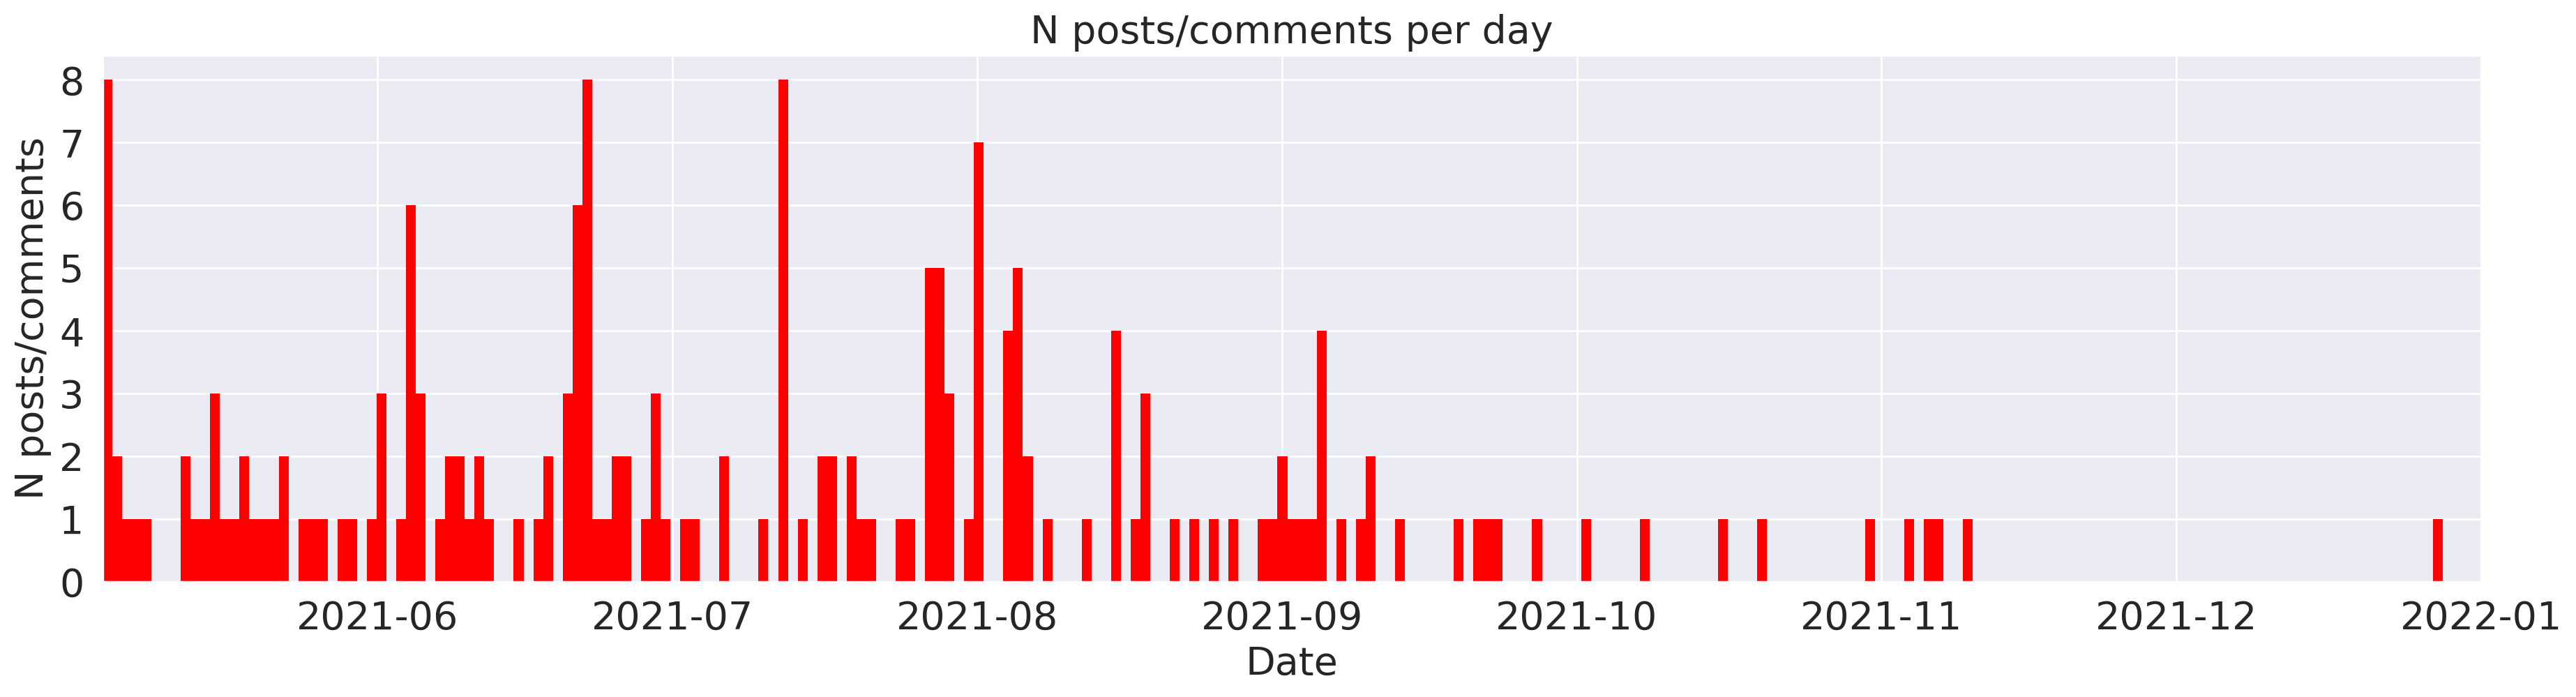

FourSentenceStories has 200.0 posts/comments
FourSentenceStories has 79 comments
FourSentenceStories has 121 posts
The average number of posts/comments per day is 1.92
start date: 2021-05-04 00:00:00
end date: 2022-01-27 00:00:00


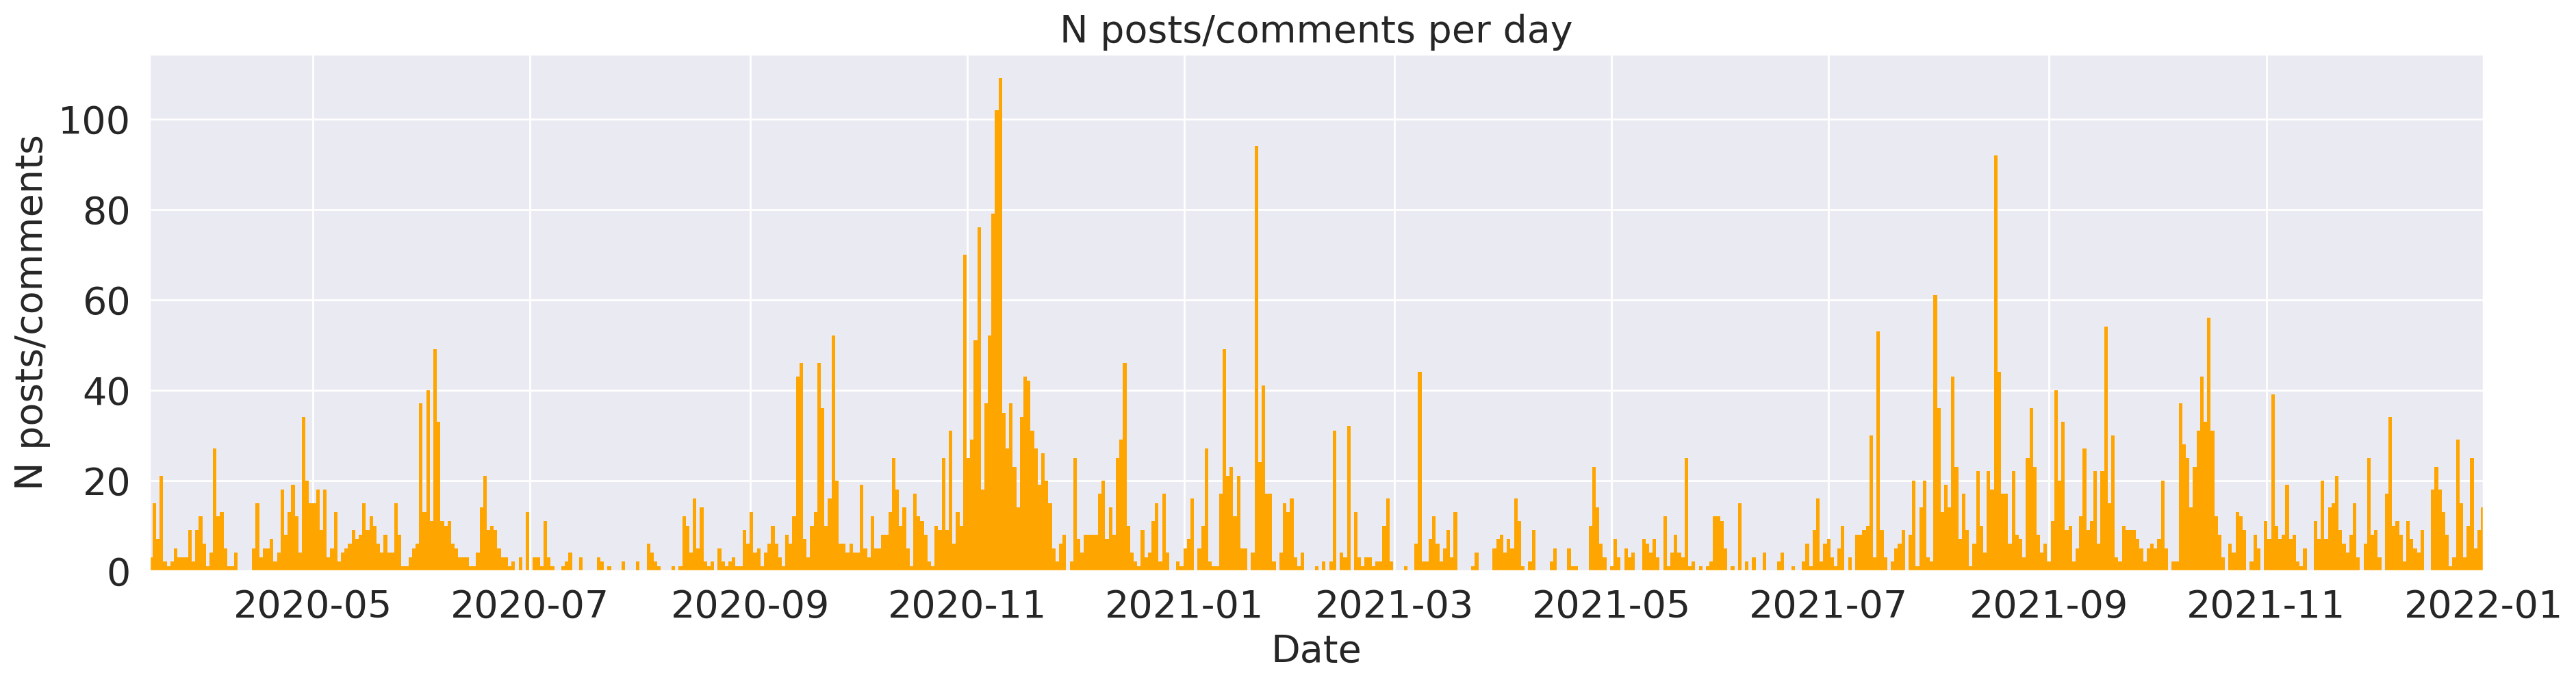

Trump666 has 6746.0 posts/comments
Trump666 has 5616 comments
Trump666 has 1130 posts
The average number of posts/comments per day is 11.63
start date: 2020-03-16 00:00:00
end date: 2022-10-04 00:00:00


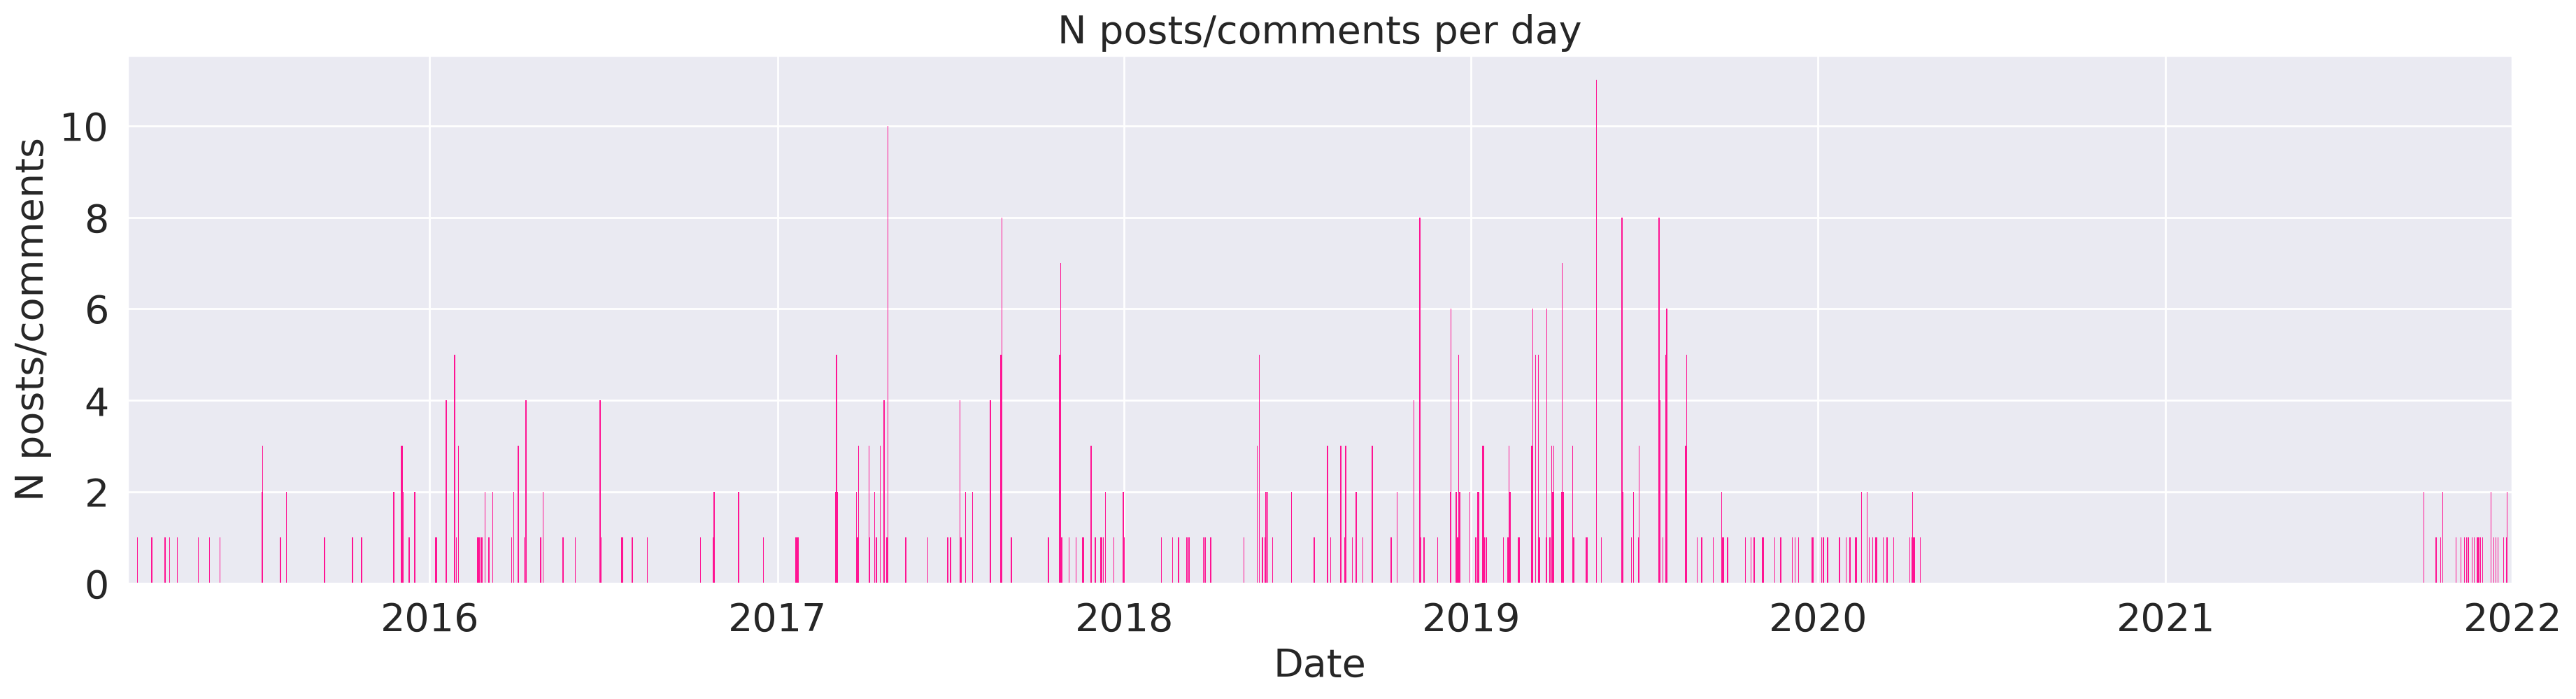

GraphTheory has 497.0 posts/comments
GraphTheory has 303 comments
GraphTheory has 194 posts
The average number of posts/comments per day is 1.89
start date: 2015-02-17 00:00:00
end date: 2021-12-27 00:00:00


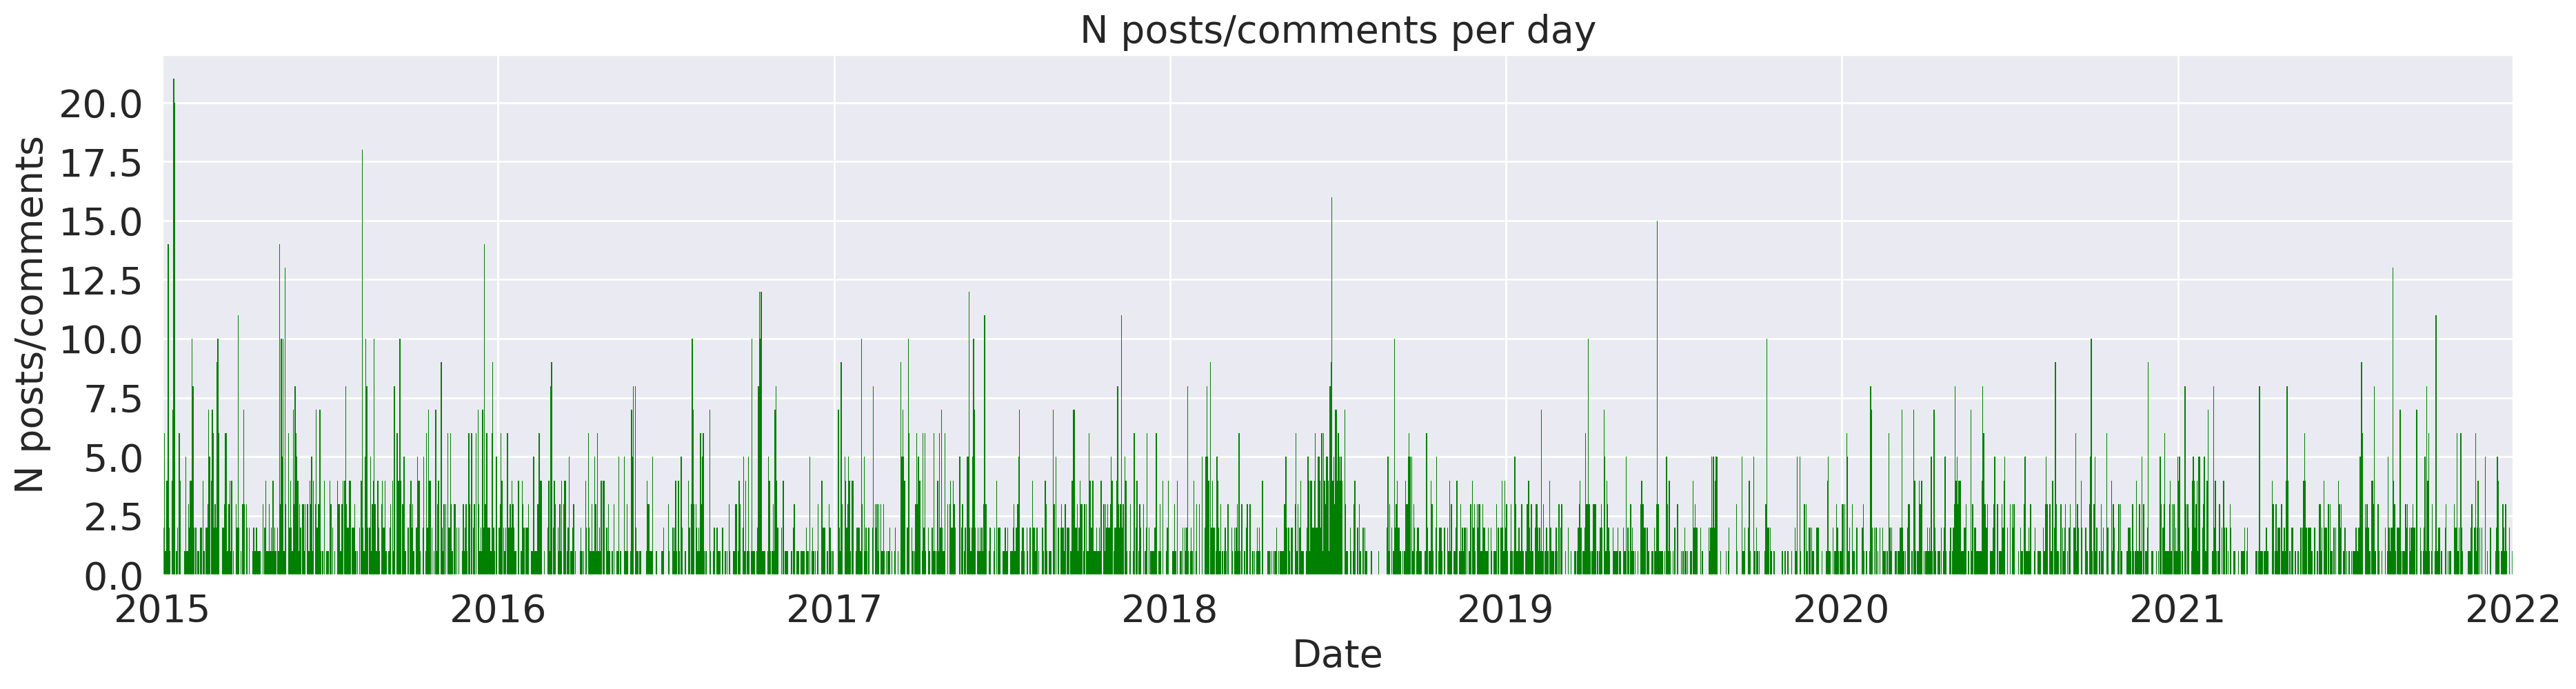

jazznoir has 4725.0 posts/comments
jazznoir has 2109 comments
jazznoir has 2616 posts
The average number of posts/comments per day is 2.69
start date: 2015-01-01 00:00:00
end date: 2022-09-03 00:00:00


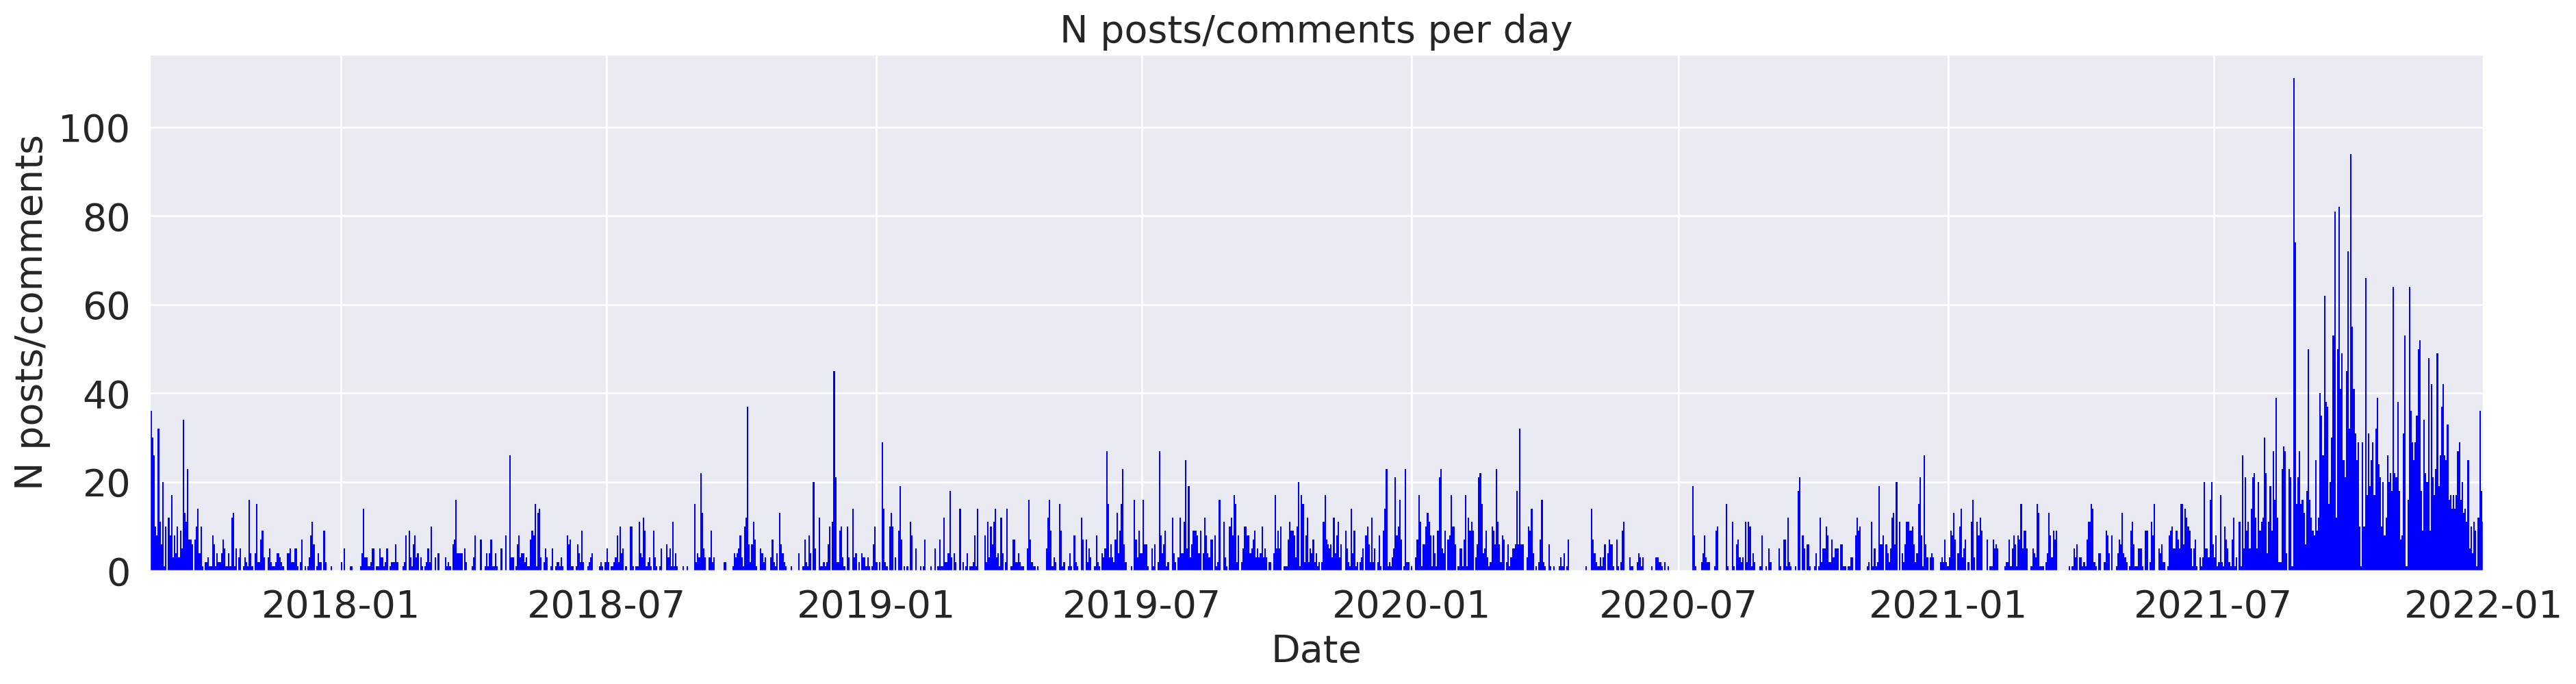

indoorbouldering has 10532.0 posts/comments
indoorbouldering has 8912 comments
indoorbouldering has 1620 posts
The average number of posts/comments per day is 8.12
start date: 2017-08-23 00:00:00
end date: 2022-10-03 00:00:00


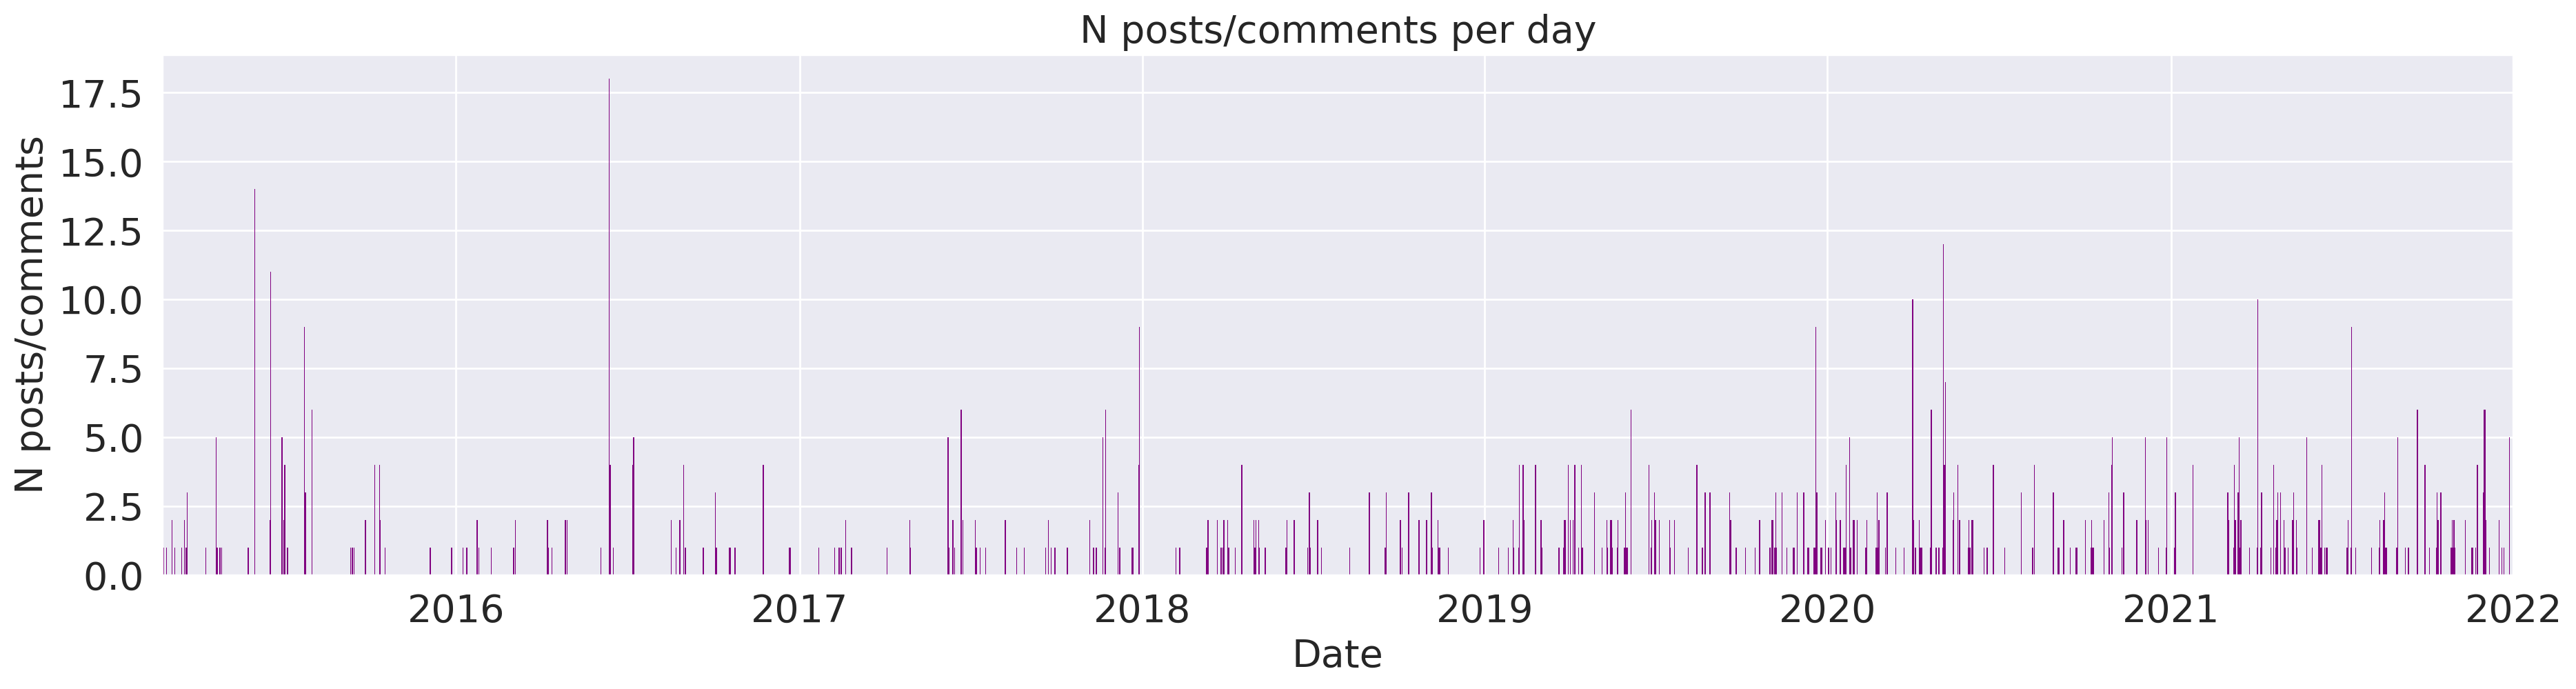

kiwi_bird has 862.0 posts/comments
kiwi_bird has 508 comments
kiwi_bird has 354 posts
The average number of posts/comments per day is 2.17
start date: 2015-02-22 00:00:00
end date: 2022-07-19 00:00:00


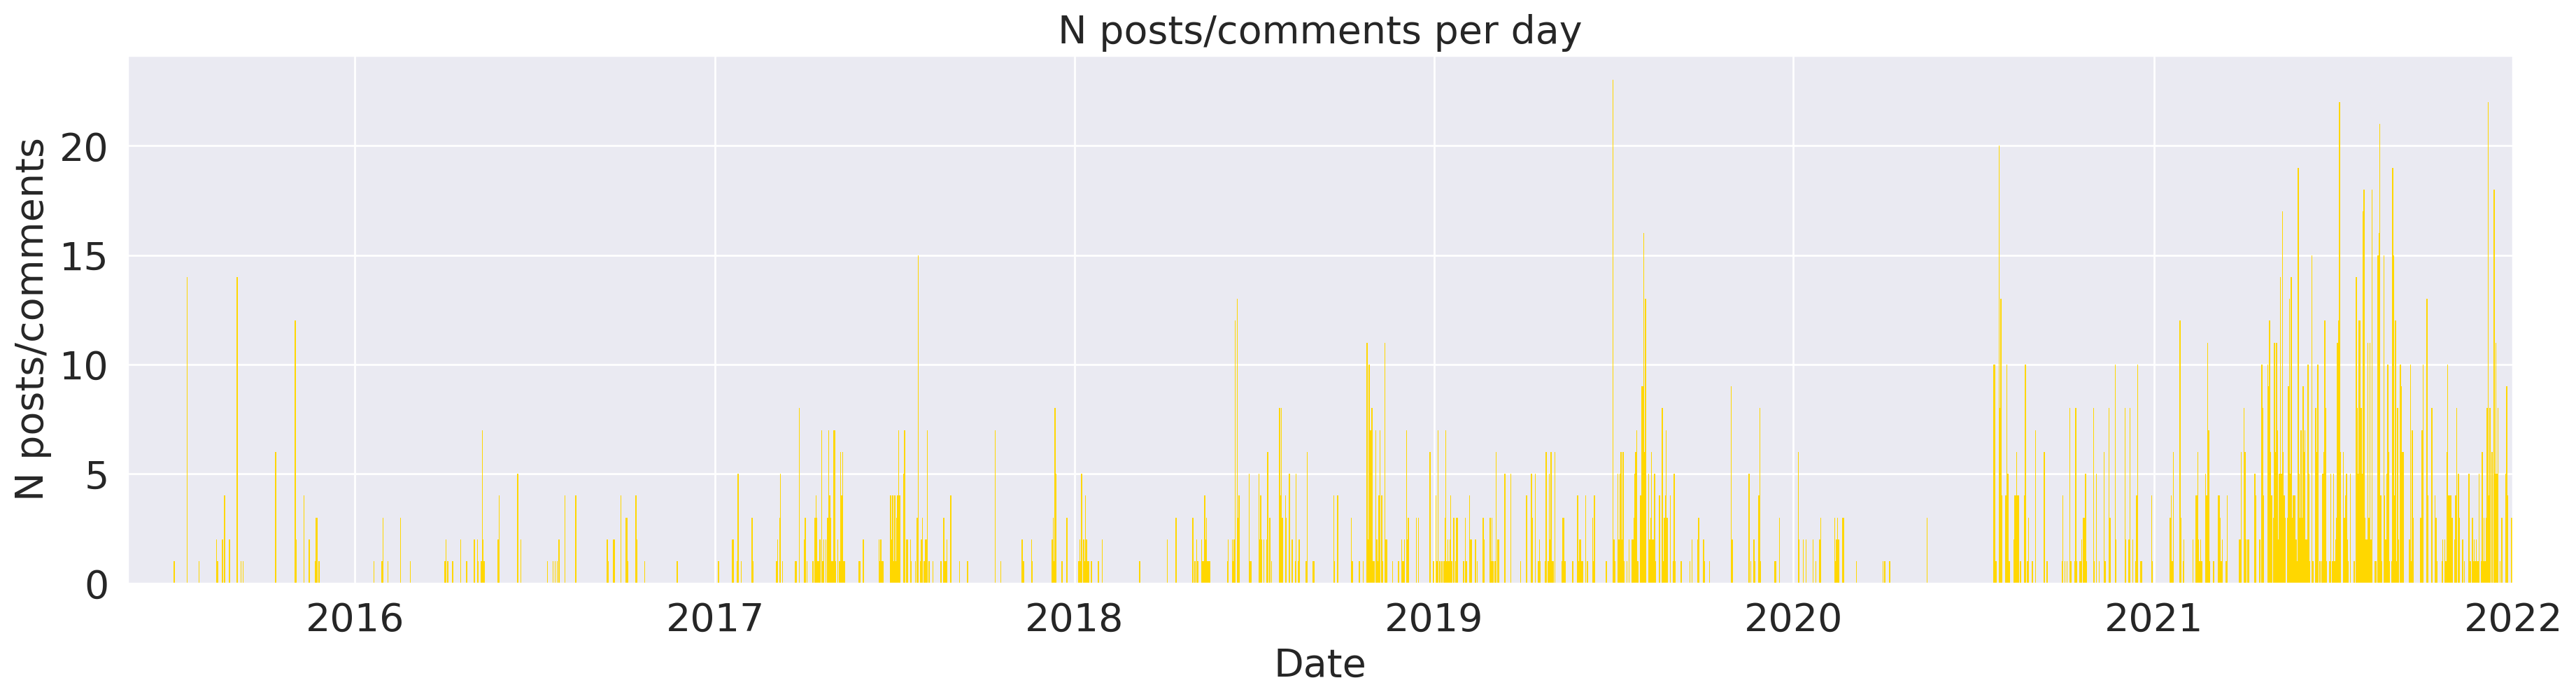

DTU has 2788.0 posts/comments
DTU has 2302 comments
DTU has 486 posts
The average number of posts/comments per day is 3.88
start date: 2015-05-15 00:00:00
end date: 2022-01-01 00:00:00


In [ ]:
def plot_post_comment_over_time(subreddit):
    d=pd.concat([df_comment_dict[subreddit][['date','id']],df_post_dict[subreddit][['date','id']]])
    d=d['date'].apply(lambda x: x.date()).value_counts()
    plt.figure(figsize=(22,5),dpi=200)
    d.sort_index(inplace=True)
    d=d.asfreq('D')
    plt.hist(d.index, weights=d.values, bins=int(len(d.values)), color=color_dict[subreddit],edgecolor='none')
    plt.xlim(d.index.min(),datetime.date(2022,1,1))
    # plt.title(subreddit,fontsize=20)
    plt.xlabel('Date',fontsize=20)
    plt.ylabel('N posts/comments',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title('N posts/comments per day',fontsize=20)
    p = '/home/pelle/Master_Thesis/reports/figures'
    plt.savefig(p + '/'+ subreddit + '_activity_time' + '.png', bbox_inches='tight')
    plt.show()
    print(subreddit, 'has', d.sum(), 'posts/comments')
    print(subreddit, 'has', len(df_comment_dict[subreddit]), 'comments')
    print(subreddit, 'has', len(df_post_dict[subreddit]), 'posts')
    print('The average number of posts/comments per day is', round(d.mean(),2))
    print('start date: ' + str(d.index.min()))
    print('end date: ' + str(d.index.max()))


for i,subreddit in enumerate(subreddits):
    plot_post_comment_over_time(subreddit)

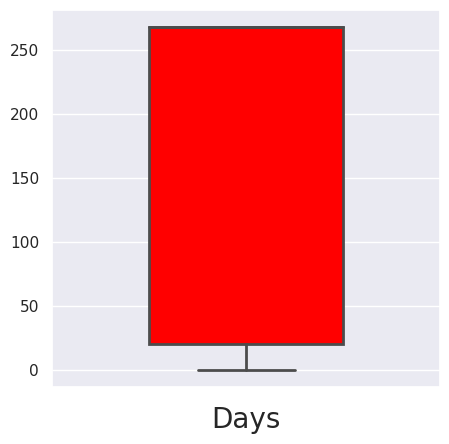

The average time between comment and post is 174 days
The median time between comment and post is 268 days
The standard deviation of the time between comment and post is 120 days
The minimum time between comment and post is 0 days
The maximum time between comment and post is 268 days


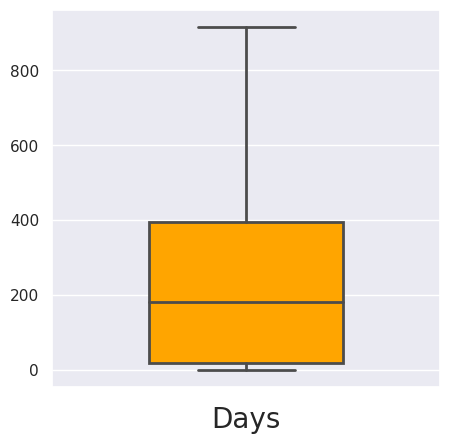

The average time between comment and post is 282 days
The median time between comment and post is 183 days
The standard deviation of the time between comment and post is 311 days
The minimum time between comment and post is 0 days
The maximum time between comment and post is 916 days


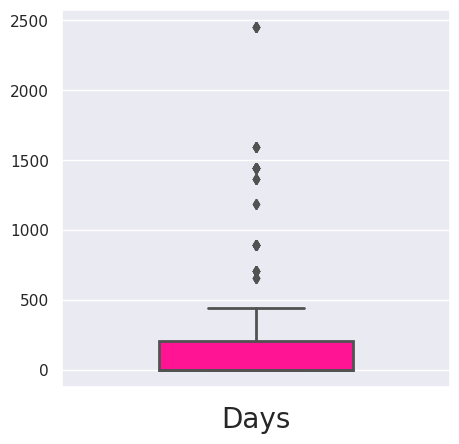

The average time between comment and post is 261 days
The median time between comment and post is 0 days
The standard deviation of the time between comment and post is 523 days
The minimum time between comment and post is 0 days
The maximum time between comment and post is 2454 days


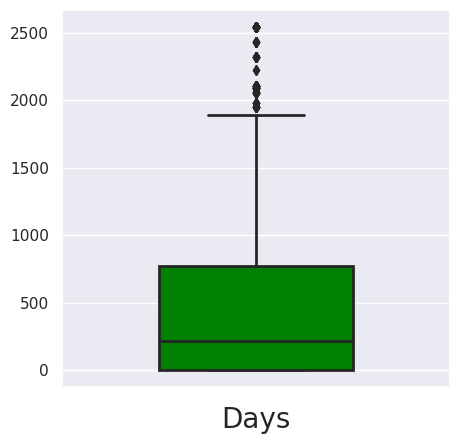

The average time between comment and post is 510 days
The median time between comment and post is 219 days
The standard deviation of the time between comment and post is 655 days
The minimum time between comment and post is 0 days
The maximum time between comment and post is 2542 days


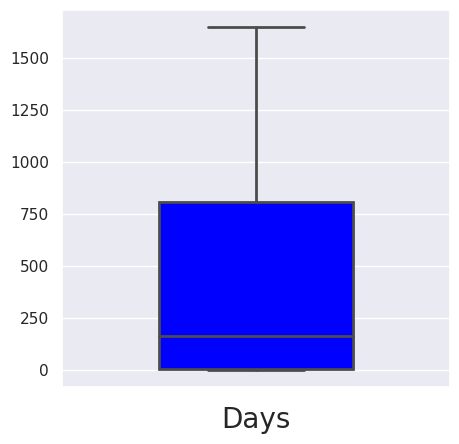

The average time between comment and post is 441 days
The median time between comment and post is 164 days
The standard deviation of the time between comment and post is 516 days
The minimum time between comment and post is 0 days
The maximum time between comment and post is 1649 days


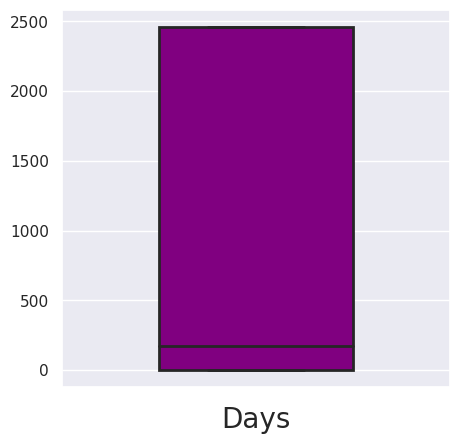

The average time between comment and post is 926 days
The median time between comment and post is 172 days
The standard deviation of the time between comment and post is 1072 days
The minimum time between comment and post is 0 days
The maximum time between comment and post is 2461 days


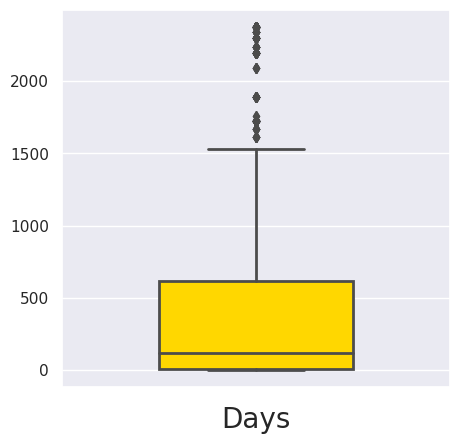

The average time between comment and post is 449 days
The median time between comment and post is 119 days
The standard deviation of the time between comment and post is 655 days
The minimum time between comment and post is 0 days
The maximum time between comment and post is 2374 days


In [ ]:
# plot boxplot of delta time

for i,subreddit in enumerate(subreddits):
    plt.figure(figsize=(5,5),dpi=100)
    sns.boxplot(y=df_comment_post_dict[subreddit]['delta_time'].apply(lambda x: x.days).values, color=color_dict[subreddit], 
    linewidth=2, 
    width=.5, saturation=1, fliersize=5, whis=1.5)
    plt.title('',fontsize=20)
    plt.xlabel('Days',fontsize=20)
    p = '/home/pelle/Master_Thesis/reports/figures'
    plt.savefig(p + '/'+ subreddit + '_delta_time' + '.png', bbox_inches='tight')
    plt.show()
    # describe
    # print(subreddit, 'has', len(df_comment_post_dict[subreddit]), 'comment-post pairs')
    print('The average time between comment and post is', round(df_comment_post_dict[subreddit]['delta_time'].mean().days,2), 'days')
    print('The median time between comment and post is', round(df_comment_post_dict[subreddit]['delta_time'].median().days,2), 'days')
    print('The standard deviation of the time between comment and post is', round(df_comment_post_dict[subreddit]['delta_time'].std().days,2), 'days')
    print('The minimum time between comment and post is', round(df_comment_post_dict[subreddit]['delta_time'].min().days,2), 'days')
    print('The maximum time between comment and post is', round(df_comment_post_dict[subreddit]['delta_time'].max().days,2), 'days')    

In [ ]:
# plot mean score distribution
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

for i,subreddit in enumerate(subreddits):
    plt.figure(figsize=(10,5),dpi=100)
    # sns.histplot(x=df_authors_dict[subreddit]['mean_score'].values, color=color_dict[subreddit])
    sns.kdeplot(x=df_authors_dict[subreddit]['mean_score'].values, color=color_dict[subreddit],shade=True,linewidth=2, fill=True)
    # mean line
    plt.axvline(df_authors_dict[subreddit]['mean_score'].mean(), color='black', linestyle='dashed', linewidth=1)

    plt.axvline(df_authors_dict[subreddit]['mean_score'].median(), color='black', linestyle='-', linewidth=1)
   
    legend_elements = [Line2D([0], [0], color='black', marker='_', label='mean',linestyle='--', markersize=0, linewidth=2), Line2D([0], [0], marker='_', color='black', label='median')]

    plt.legend(handles=legend_elements, loc='upper right', fontsize=18)
    # plt.title(subreddit,fontsize=20)
    plt.ylabel('Proportion of Authors',fontsize=20)
    plt.xlabel('Mean score',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title('Mean score distribution',fontsize=20)
    p = '/home/pelle/Master_Thesis/reports/figures'
    plt.savefig(p + '/mean_score_distribution_' + subreddit + '.png', bbox_inches='tight')
    plt.show()
    # proportion of mean score above the mean
    # y in kde plot
    print(subreddit, 'has', len(df_authors_dict[subreddit]), 'authors')
    print('The average mean score is', round(df_authors_dict[subreddit]['mean_score'].mean(),2))
    print('The median mean score is', round(df_authors_dict[subreddit]['mean_score'].median(),2))
    print('The standard deviation of the mean score is', round(df_authors_dict[subreddit]['mean_score'].std(),2))
    print('The minimum mean score is', round(df_authors_dict[subreddit]['mean_score'].min(),2))
    print('The maximum mean score is', round(df_authors_dict[subreddit]['mean_score'].max(),2))
    

# df_authors_dict

NameError: name 'subreddits' is not defined

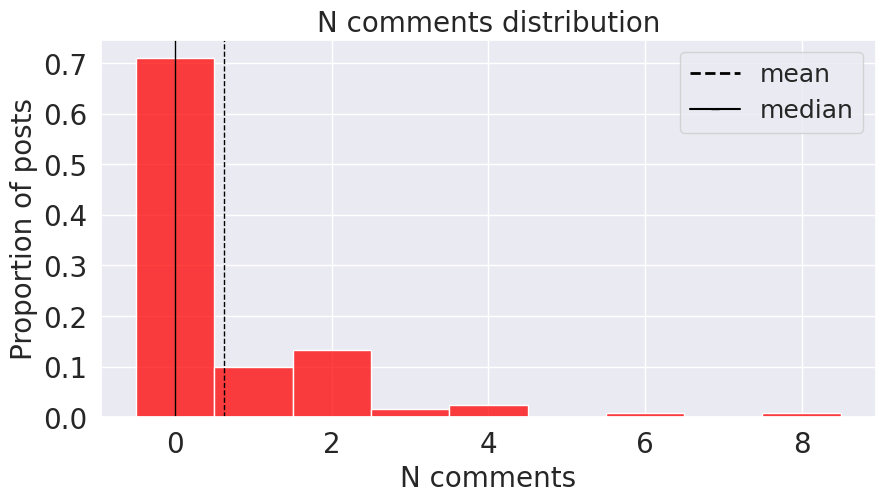

FourSentenceStories has 121 authors
The average N comments is 0.63
The median N comments is 0.0
The standard deviation of the N comments is 1.27
The minimum N comments is 0
The maximum N comments is 8


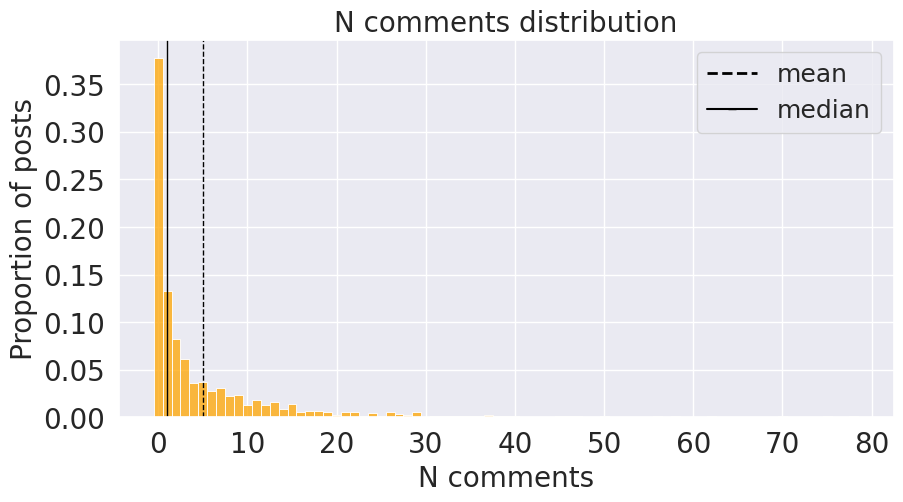

Trump666 has 1130 authors
The average N comments is 5.05
The median N comments is 1.0
The standard deviation of the N comments is 8.96
The minimum N comments is 0
The maximum N comments is 78


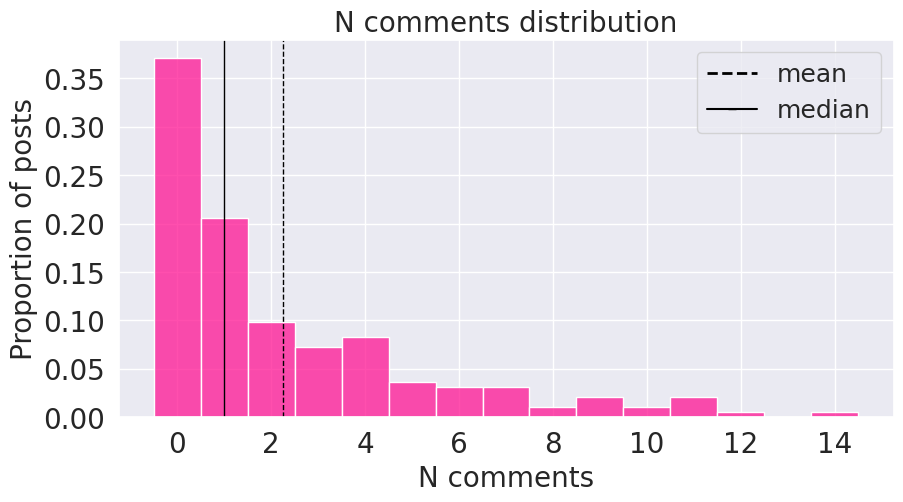

GraphTheory has 194 authors
The average N comments is 2.26
The median N comments is 1.0
The standard deviation of the N comments is 2.94
The minimum N comments is 0
The maximum N comments is 14


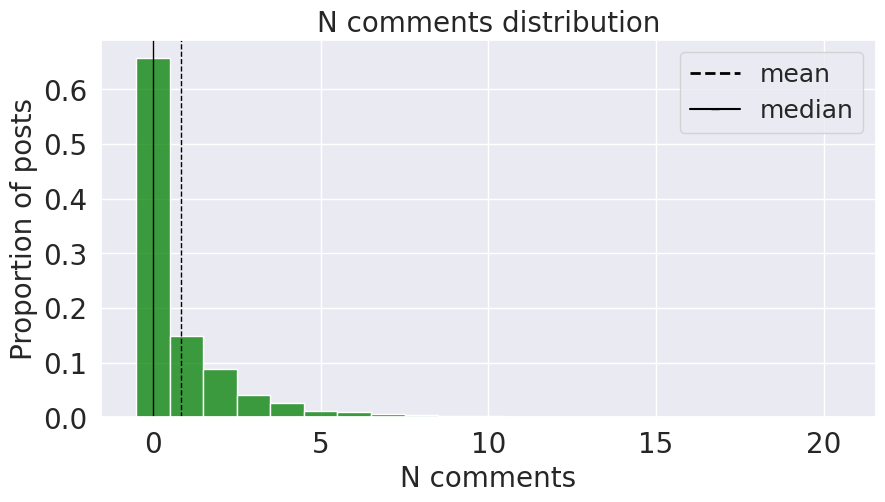

jazznoir has 2616 authors
The average N comments is 0.83
The median N comments is 0.0
The standard deviation of the N comments is 1.7
The minimum N comments is 0
The maximum N comments is 20


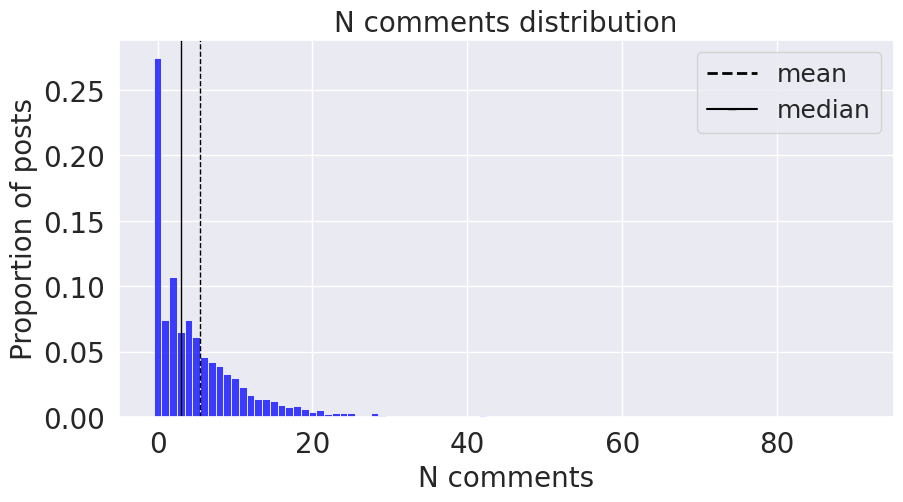

indoorbouldering has 1620 authors
The average N comments is 5.46
The median N comments is 3.0
The standard deviation of the N comments is 7.63
The minimum N comments is 0
The maximum N comments is 90


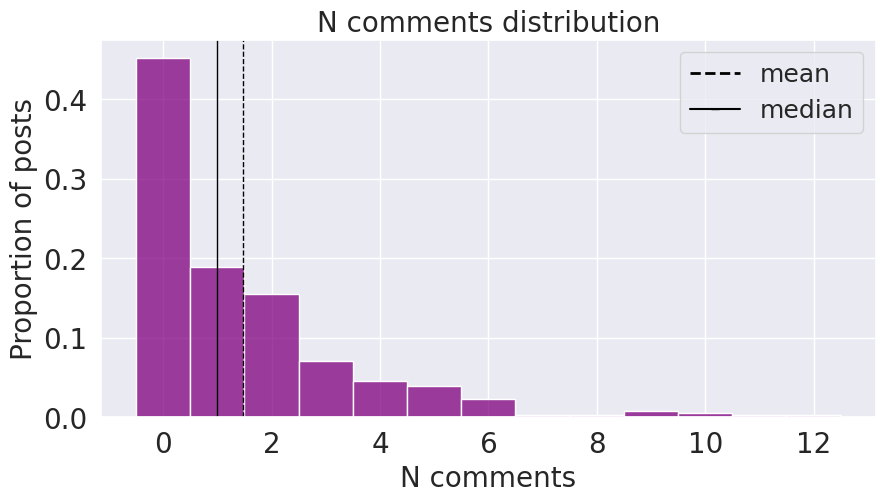

kiwi_bird has 354 authors
The average N comments is 1.47
The median N comments is 1.0
The standard deviation of the N comments is 2.04
The minimum N comments is 0
The maximum N comments is 12


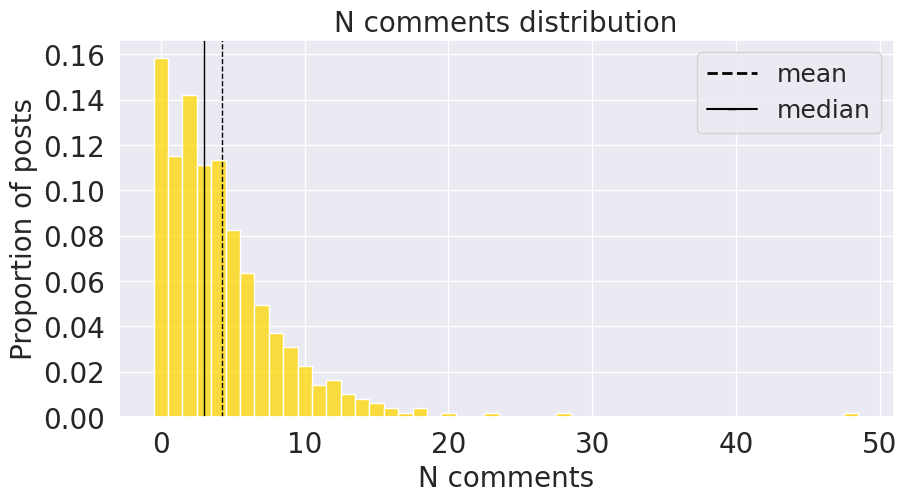

DTU has 486 authors
The average N comments is 4.24
The median N comments is 3.0
The standard deviation of the N comments is 4.42
The minimum N comments is 0
The maximum N comments is 48


In [ ]:
# plot n_comments distribution
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

for i,subreddit in enumerate(subreddits):
    plt.figure(figsize=(10,5),dpi=100)
    sns.histplot(x=df_post_dict[subreddit]['n_comments'].values, color=color_dict[subreddit], stat='probability', discrete=True)
    # sns.kdeplot(x=df_post_dict[subreddit]['n_comments'].values, color=color_dict[subreddit],shade=True,linewidth=2, fill=True, bw_adjust=)
    # mean line
    plt.axvline(df_post_dict[subreddit]['n_comments'].mean(), color='black', linestyle='dashed', linewidth=1)

    plt.axvline(df_post_dict[subreddit]['n_comments'].median(), color='black', linestyle='-', linewidth=1)
   
    legend_elements = [Line2D([0], [0], color='black', marker='_', label='mean',linestyle='--', markersize=0, linewidth=2), Line2D([0], [0], marker='_', color='black', label='median')]

    plt.legend(handles=legend_elements, loc='upper right', fontsize=18)
    # plt.title(subreddit,fontsize=20)
    plt.ylabel('Proportion of posts',fontsize=20)
    plt.xlabel('N comments',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title('N comments distribution',fontsize=20)
    p = '/home/pelle/Master_Thesis/reports/figures'
    plt.savefig(p + '/n_comments_distribution_' + subreddit + '.png', bbox_inches='tight')
    plt.show()
    # proportion of mean score above the mean
    # y in kde plot
    print('The average N comments is', round(df_post_dict[subreddit]['n_comments'].mean(),2))
    print('The median N comments is', round(df_post_dict[subreddit]['n_comments'].median(),2))
    print('The standard deviation of the N comments is', round(df_post_dict[subreddit]['n_comments'].std(),2))
    print('The minimum N comments is', round(df_post_dict[subreddit]['n_comments'].min(),2))
    print('The maximum N comments is', round(df_post_dict[subreddit]['n_comments'].max(),2))

FourSentenceStories


<Figure size 1000x500 with 0 Axes>

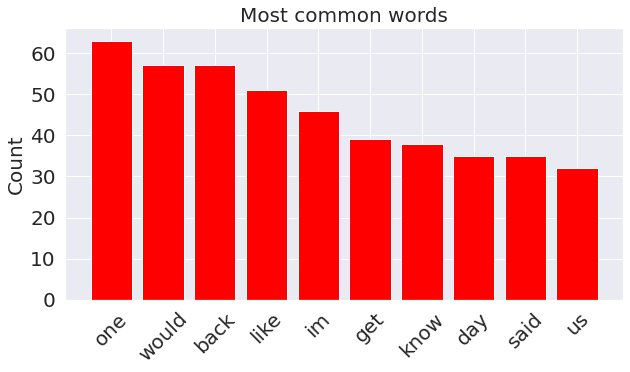

Trump666


<Figure size 1000x500 with 0 Axes>

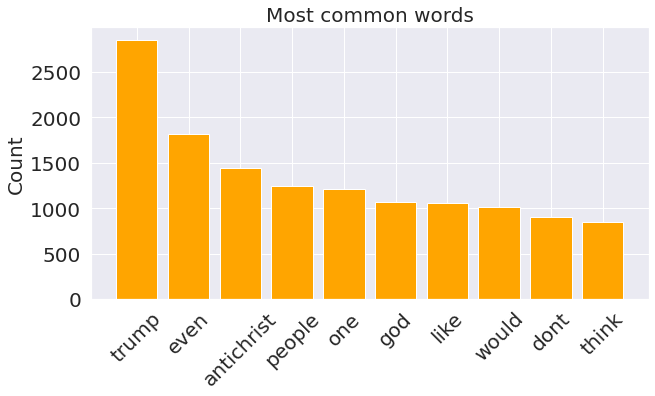

GraphTheory


<Figure size 1000x500 with 0 Axes>

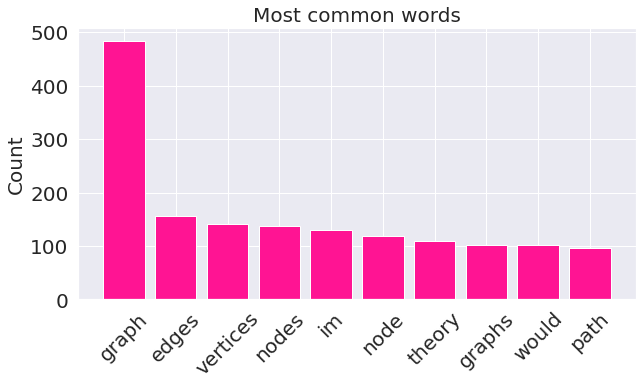

jazznoir


<Figure size 1000x500 with 0 Axes>

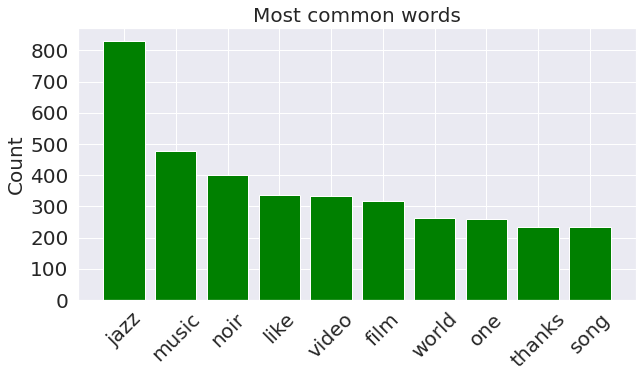

indoorbouldering


<Figure size 1000x500 with 0 Axes>

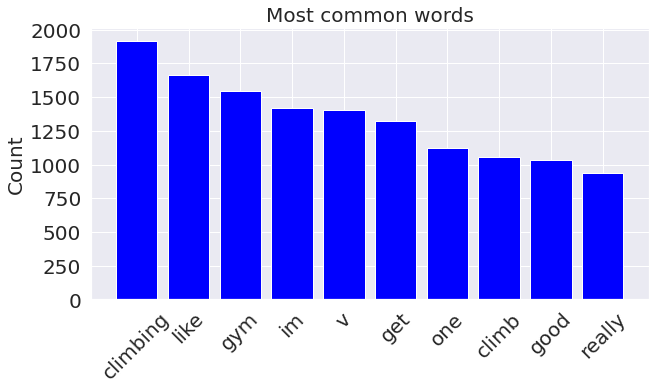

kiwi_bird


<Figure size 1000x500 with 0 Axes>

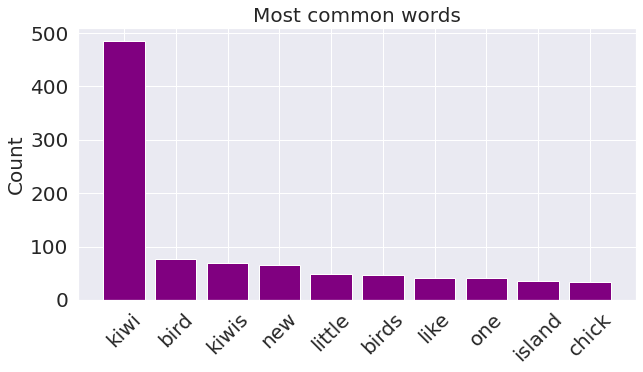

DTU


<Figure size 1000x500 with 0 Axes>

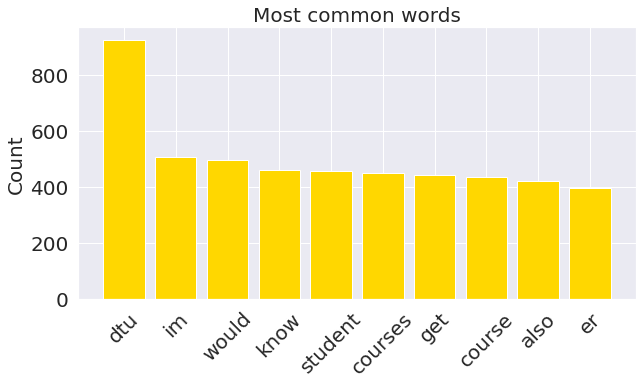

In [ ]:
stop_words = set(stopwords.words('english'))

for subreddit in subreddits:
    if 'text' in df_comment_dict[subreddit].columns:
        # rename text column name
        df_comment_dict[subreddit] = df_comment_dict[subreddit].rename(columns={'text':'body'})

def get_most_common_words(df,df_comment, n=10):
    words = []
    df1 = df['text'].apply(lambda x: '' if pd.isna(x) else x) + ' ' + df['title']
    df2 = df_comment['body']
    for text in pd.concat([df1, df2], axis=0):
        if isinstance(text, str):
            text = text.lower()
            text = text.translate(str.maketrans('', '', string.punctuation))
            text = text.translate(str.maketrans('', '', string.digits))
            text = text.translate(str.maketrans('', '', '“'))
            text = text.translate(str.maketrans('', '', '”'))
            text = text.translate(str.maketrans('', '', '’'))
            word_tokens = word_tokenize(text)
            words.extend(word_tokens)
        words = [w for w in words if not w in stop_words]
        word_count = Counter(words)
    return word_count.most_common(n)
    
# plot most common words
def plot_most_common_words(df,df_comment, n=10, subreddit=subreddit):
    print(subreddit)
    plt.figure(figsize=(10, 5),dpi=100)
    word_count = get_most_common_words(df, df_comment, n)
    words = [w[0] for w in word_count]
    counts = [w[1] for w in word_count]
    plt.figure(figsize=(10,5))
    plt.xticks(fontsize=20,rotation=45)
    plt.yticks(fontsize=20,)
    plt.ylabel('Count',fontsize=20)
    plt.bar(words, counts,color=color_dict[subreddit])
    plt.title('Most common words',fontsize=20)
    p = '/home/pelle/Master_Thesis/reports/figures'
    plt.savefig(p + '/most_common_words_' + subreddit + '.png', bbox_inches='tight')
    plt.show()

for subreddit in subreddits:
    plot_most_common_words(df_post_dict[subreddit], df_comment_dict[subreddit], 10,subreddit)

FourSentenceStories


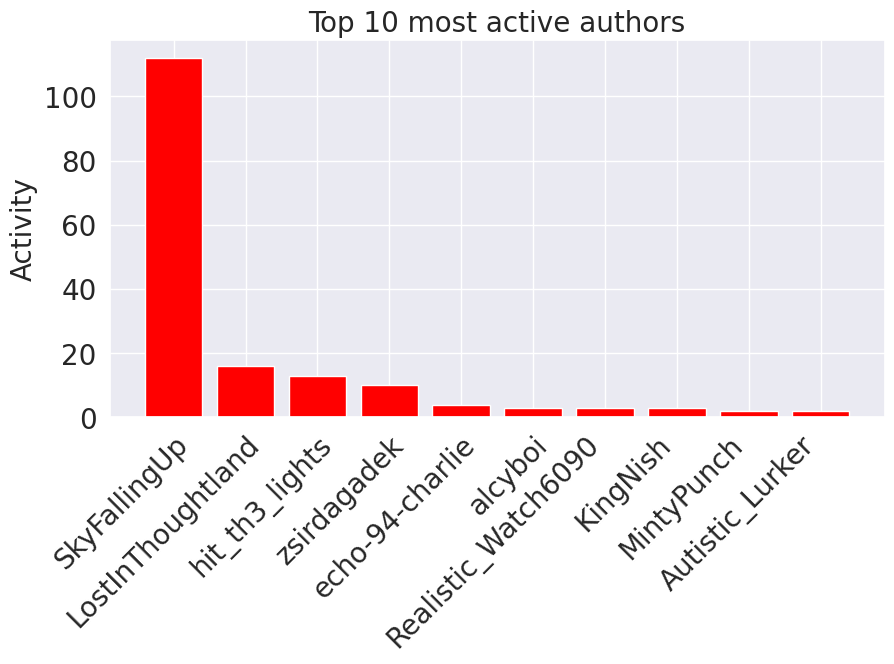

Trump666


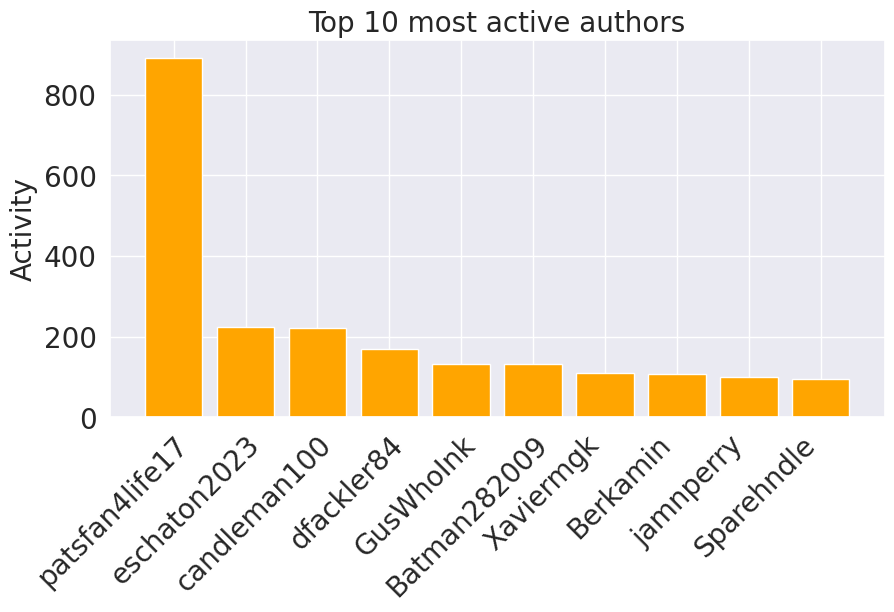

GraphTheory


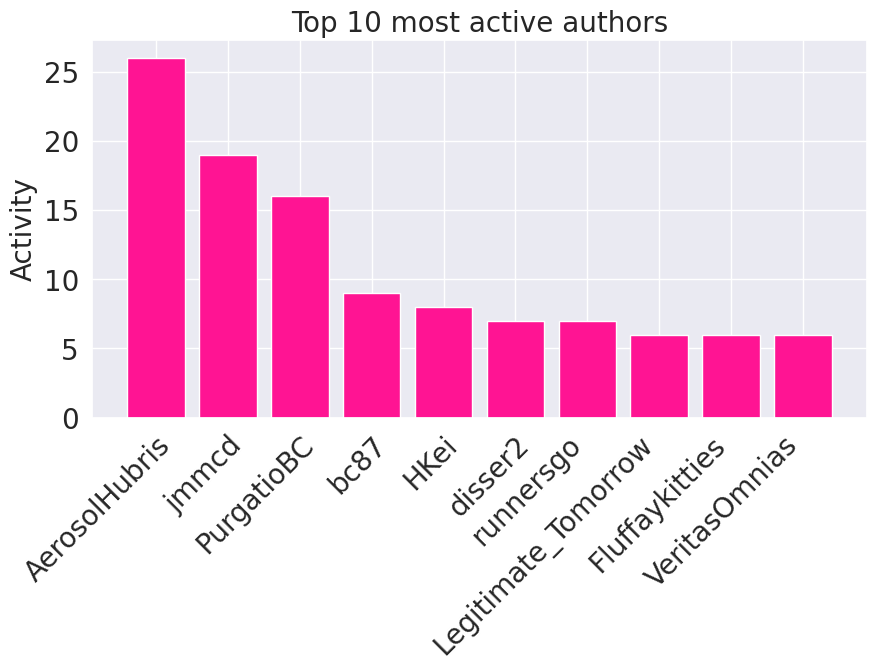

jazznoir


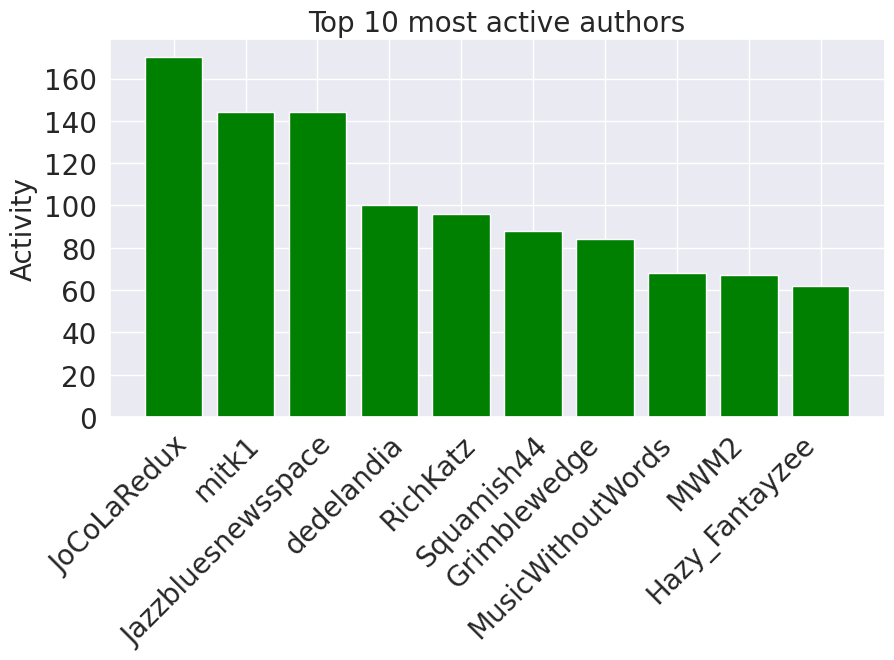

indoorbouldering


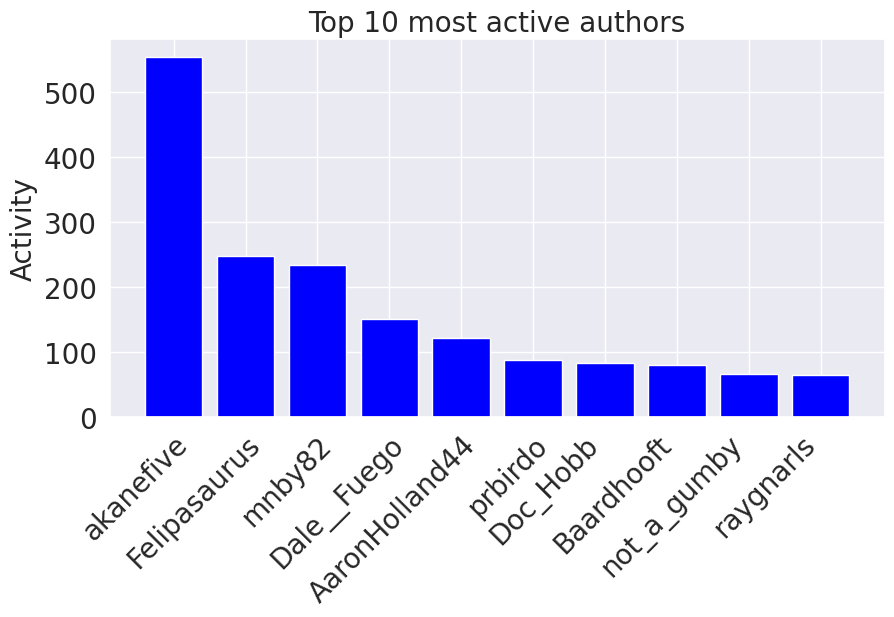

kiwi_bird


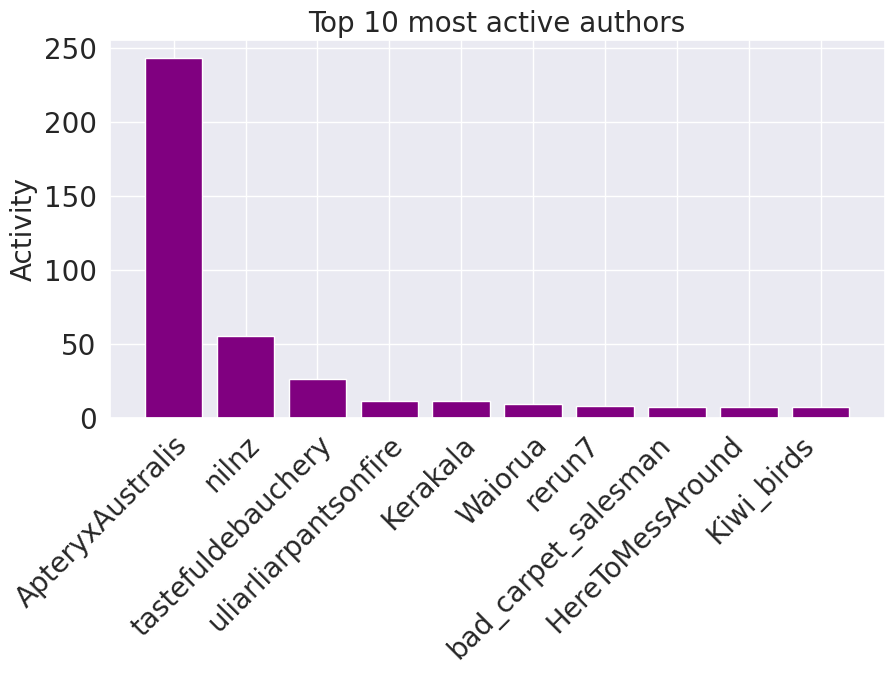

DTU


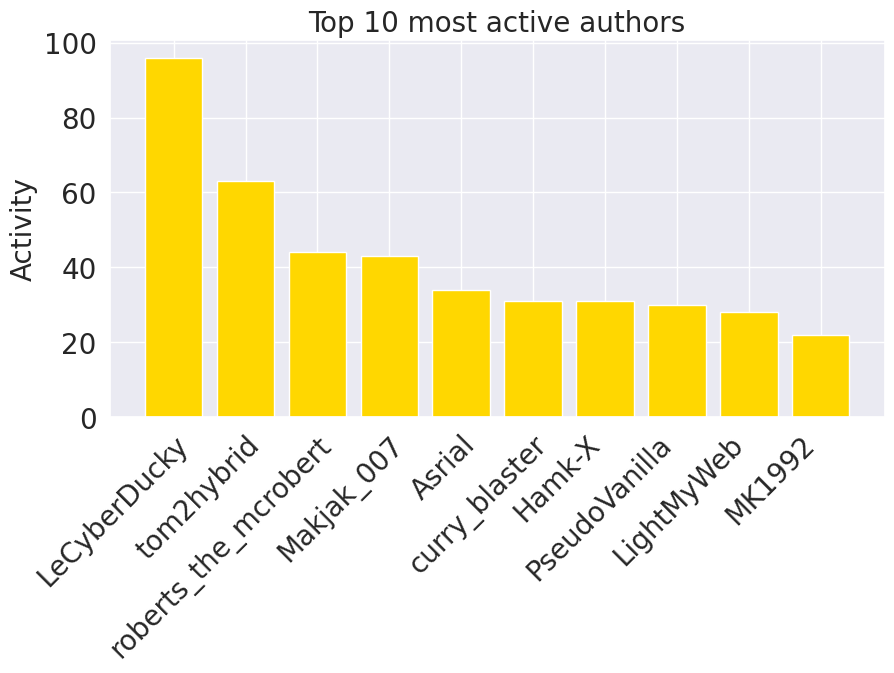

In [ ]:
# remove deleted author
for subreddit in subreddits:
    df_authors_dict[subreddit] = df_authors_dict[subreddit][df_authors_dict[subreddit].index != '[deleted]']
    top10=df_authors_dict[subreddit].sort_values(by='Activity',ascending=False).head(10)
    print(subreddit)
    # plot
    plt.figure(figsize=(10,5),dpi=100)
    plt.xticks(fontsize=20,rotation=45,ha='right',rotation_mode='anchor')
    plt.yticks(fontsize=20)
    plt.ylabel('Activity',fontsize=20)
    plt.bar(top10.index, top10['Activity'],color=color_dict[subreddit])
    plt.title('Top 10 most active authors',fontsize=20)
    p = '/home/pelle/Master_Thesis/reports/figures'
    plt.savefig(p + '/top10_most_active_authors_' + subreddit + '.png', bbox_inches='tight')
    plt.show()

In [ ]:
# # plot degree accumulative distribution
# fig=plt.figure(figsize=(12,12))
# # axs = axs.flatten()
# for i,subreddit in enumerate(subreddits):
#     degrees = [G_dict[subreddit].degree(n) for n in G_dict[subreddit].nodes]
#     sns.ecdfplot(degrees,log_scale=False,color=color_dict[subreddit],label=subreddit)
#     plt.xlim(0,20)
#     plt.legend(subreddits)
#     # axs[i].set_title(subreddit)
#     # axs[i].set_xlabel('Degree')
#     # axs[i].set_ylabel('Count')

In [ ]:
# # plot in degree distribution
# fig, axs = plt.subplots(3, 2, figsize=(8*2,8*3))
# axs = axs.flatten()
# for i,subreddit in enumerate(subreddits):
#     degrees = [G_di_dict[subreddit].out_degree(n) for n in G_di_dict[subreddit].nodes]
#     sns.histplot(degrees,ax=axs[i],kde=True)
#     axs[i].set_title(subreddit)
#     axs[i].set_xlabel('In Degree')
#     axs[i].set_ylabel('Count')

In [ ]:
# fig, axs = plt.subplots(3, 2, figsize=(8*2,8*3))
# axs = axs.flatten()
# for i,subreddit in enumerate(subreddits):
#     sns.ecdfplot([df_authors_dict[subreddit]['Activity']], ax=axs[i])
#     axs[i].set_title(subreddit)
#     axs[i].set_xlabel('Activity')
#     axs[i].set_ylabel('Count')

In [ ]:
# fig = plt.figure(figsize=(12,12))
# # axs = axs.flatten()
# for i,subreddit in enumerate(subreddits):
#     sns.ecdfplot([df_authors_dict[subreddit]['Activity']],color=color_dict[subreddit],label=subreddit)
#     plt.legend(subreddits)

# Correlations

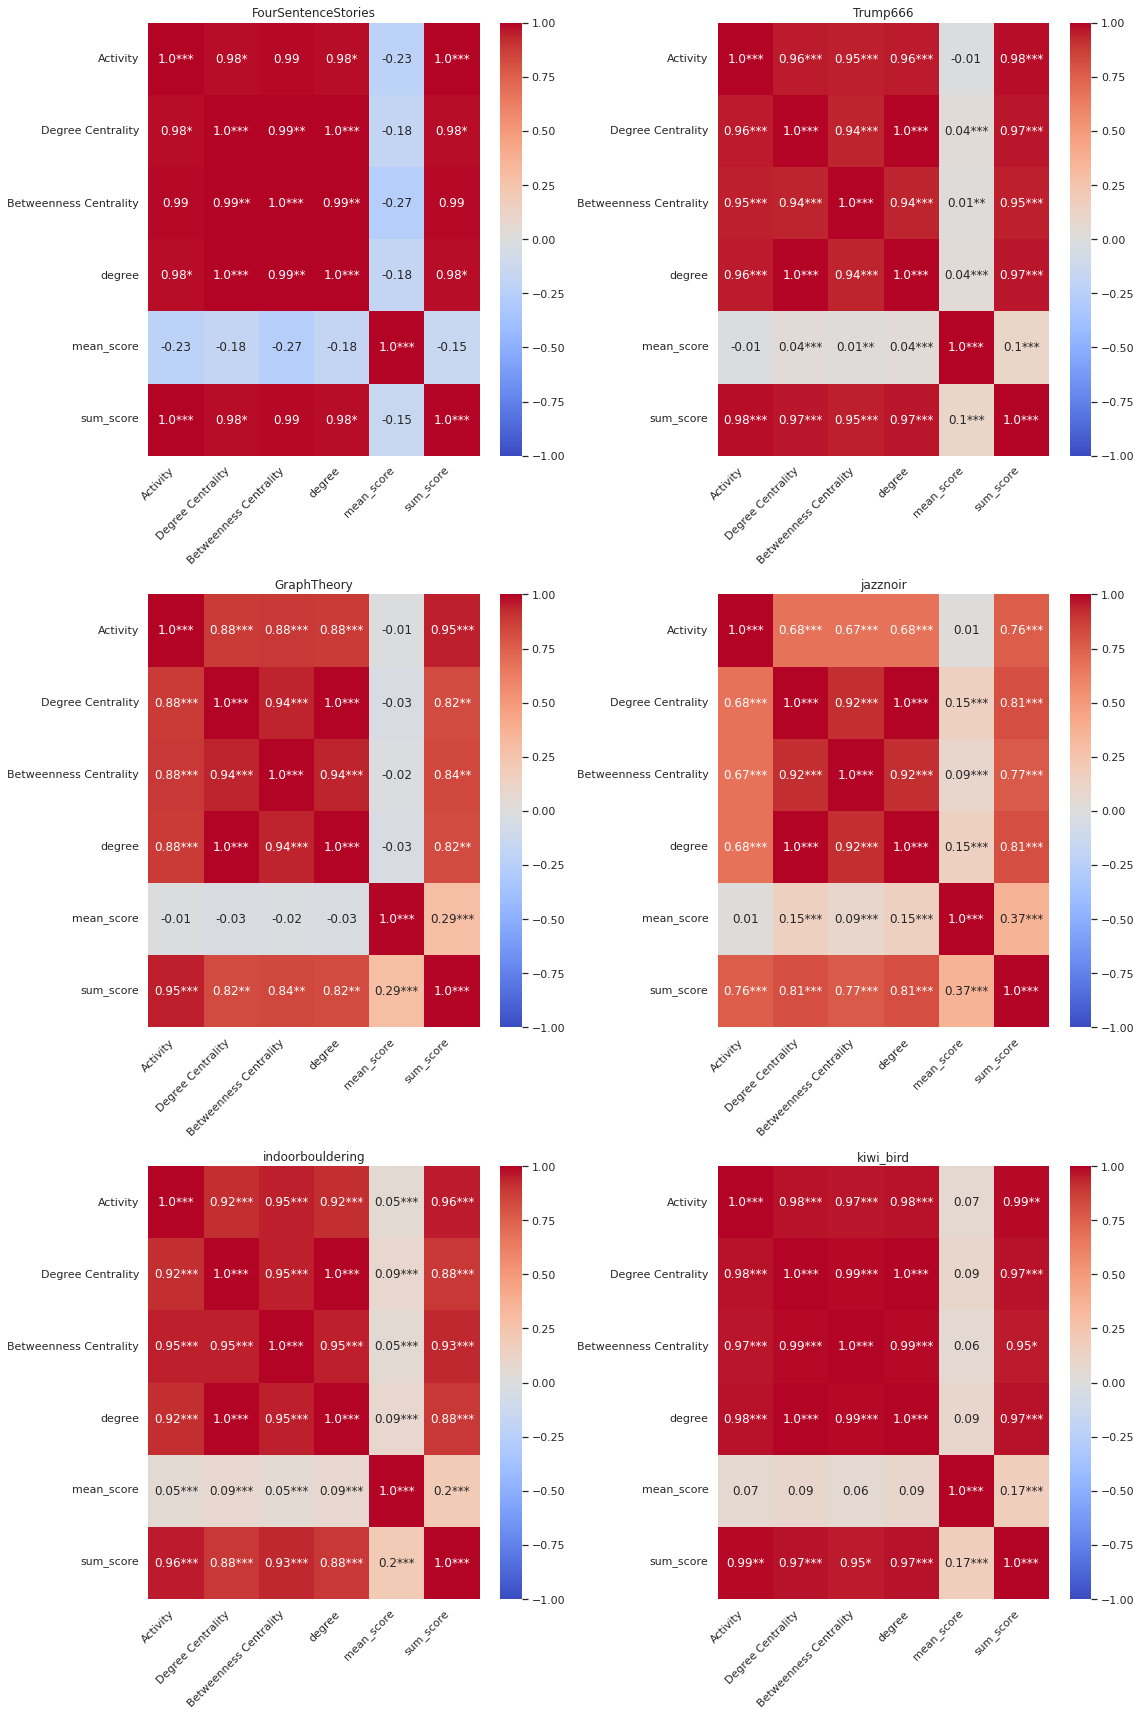

In [ ]:
# only for Activity higher than 5
fig, axs = plt.subplots(3, 2, figsize=(8*2,8*3))
axs = axs.flatten()
for i,subreddit in enumerate(subreddits):
    rho = df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>3].corr()
    pval = df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>3].corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(*rho.shape)
    p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
    
    # print(pval)

    sns.heatmap(data=rho, annot=(np.array(rho.round(2).astype(str) + p)),fmt = '',vmin=-1,vmax=1,cmap='coolwarm',ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')
    axs[i].set_title(subreddit)

plt.tight_layout()
plt.show()

In [ ]:
# join df_authors and make corralation matrix
df_authors = pd.concat(df_authors_dict)
df_authors = df_authors.reset_index()
df_authors = df_authors.rename(columns={'level_0':'subreddit','level_1':'author'})

for subreddit in tqdm.tqdm(subreddits):
    df_authors.loc[df_authors['subreddit']==subreddit,'graph_size'] = G_dict[subreddit].number_of_nodes()
    df_authors.loc[df_authors['subreddit']==subreddit,'graph_edges'] = G_dict[subreddit].number_of_edges()
    df_authors.loc[df_authors['subreddit']==subreddit,'graph_average_clustering'] = nx.average_clustering(G_dict[subreddit])
    df_authors.loc[df_authors['subreddit']==subreddit,'graph_average_shortest_path_length'] = nx.average_shortest_path_length(G_dict[subreddit])
    
df_authors.head(5)

100%|██████████| 6/6 [00:43<00:00,  7.19s/it]


subreddit             author  Activity  Degree Centrality  \
0  FourSentenceStories       SkyFallingUp       112           0.545455   
1  FourSentenceStories  LostInThoughtland        16           0.060606   
2  FourSentenceStories     hit_th3_lights        13           0.151515   
3  FourSentenceStories        zsirdagadek        10           0.060606   
4  FourSentenceStories    echo-94-charlie         4           0.030303   

   Betweenness Centrality  degree       type  mean_score  sum_score  \
0                0.336174      18       both    1.330357        149   
1                0.000000       2       both    1.937500         31   
2                0.038826       5  commenter    1.923077         25   
3                0.000000       2       both    1.600000         16   
4                0.000000       1       both    1.000000          4   

   graph_size  graph_edges  graph_average_clustering  \
0        21.0         26.0                  0.444725   
1        21.0         26.0                  0.444725   
2        21.0         26.0                  0.444725   
3        21.0         26.0                  0.444725   
4        21.0         26.0                  0.444725   

   graph_average_shortest_path_length  
0                            2.033333  
1                            2.033333  
2                            2.033333  
3                            2.033333  
4                            2.033333

- Correlation between mean score of author and the size of the graph
    - more interactions == more upvotes


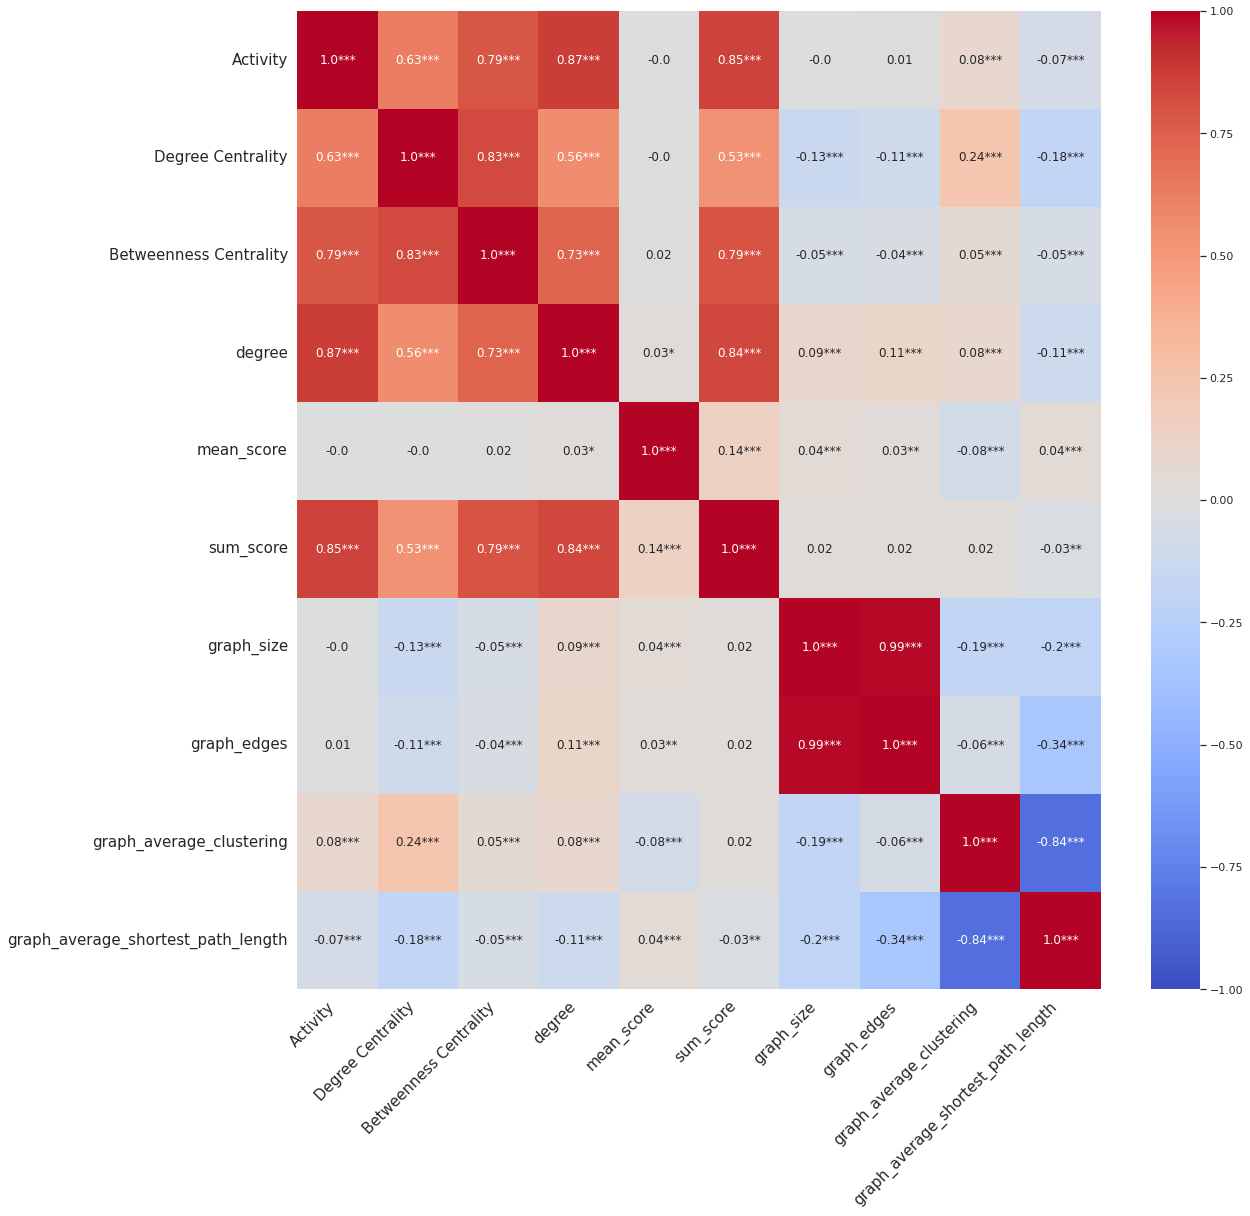

In [ ]:
rho = df_authors.corr()
pval = df_authors.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))

fig, ax = plt.subplots(figsize=(18,18))

sns.heatmap(data=rho, annot=(np.array(rho.round(2).astype(str) + p)),fmt = '',vmin=-1,vmax=1,cmap='coolwarm')
# 

# rotate xticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)

plt.savefig('correlation_matrix.png',dpi=300)
plt.show()



In [ ]:
# fig, axs = plt.subplots(3, 2, figsize=(8*2,8*3))
# axs = axs.flatten()
# for i,subreddit in enumerate(subreddits):
#     sns.scatterplot(x='degree',y='mean_score',data=df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>10],ax=axs[i])
#     # plot correlation line
#     sns.regplot(x='degree',y='mean_score',data=df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>10],ax=axs[i],scatter=False,color='red')
#     axs[i].set_title(subreddit)

In [ ]:
# fig, axs = plt.subplots(3, 2, figsize=(8*2,8*3))
# axs = axs.flatten()
# for i,subreddit in enumerate(subreddits):
#     sns.scatterplot(x='Activity',y='mean_score',data=df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>10],ax=axs[i])
#     # plot correlation line
#     sns.regplot(x='Activity',y='mean_score',data=df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>10],ax=axs[i],scatter=False,color='red')
#     axs[i].set_title(subreddit)


In [ ]:
# fig, axs = plt.subplots(3, 2, figsize=(8*2,8*3))
# axs = axs.flatten()
# for i,subreddit in enumerate(subreddits):
#     sns.scatterplot(x='Betweenness Centrality',y='mean_score',data=df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>10],ax=axs[i])
#     # plot correlation line
#     sns.regplot(x='Betweenness Centrality', y='mean_score',data=df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>10],ax=axs[i],scatter=False,color='red')
#     axs[i].set_title(subreddit) 

In [ ]:
# fig, axs = plt.subplots(3, 2, figsize=(8*2,8*3))
# axs = axs.flatten()
# for i,subreddit in enumerate(subreddits):
#     sns.scatterplot(x='Activity',y='sum_score',data=df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>10],ax=axs[i])
#     # plot correlation line
#     sns.regplot(x='Activity',y='sum_score',data=df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>10],ax=axs[i],scatter=False,color='red')
#     axs[i].set_title(subreddit)

In [ ]:
# plt.figure(figsize=(8,8))
# sns.scatterplot(x='graph_size',y='mean_score',data=df_authors[df_authors['Activity']>10])
# # plot correlation line
# sns.regplot(x='graph_size',y='mean_score',data=df_authors[df_authors['Activity']>10],scatter=False,color='red')
# plt.show()

In [ ]:
# df_authors

In [ ]:
# plt.figure(figsize=(8,8))
# sns.scatterplot(x='sum_score',y='mean_score',data=df_authors[df_authors['Activity']>10])
# # plot correlation line
# sns.regplot(x='sum_score',y='mean_score',data=df_authors[df_authors['Activity']>10],scatter=False,color='red')
# plt.show()

In [ ]:
# plt.figure(figsize=(8,8))
# sns.scatterplot(y='sum_score',x='Degree Centrality',data=df_authors[df_authors['Activity']>10])
# # plot correlation line
# sns.regplot(y='sum_score',x='Degree Centrality',data=df_authors[df_authors['Activity']>10],scatter=False,color='red')
# plt.show()

In [ ]:
# fig, axs = plt.subplots(3, 2, figsize=(8*2.5,8*3),sharey=True)

# axs = axs.flatten()

# axs[0].set_ylabel('Mean Score')
# axs[2].set_ylabel('Mean Score')    


# for subreddit in subreddits:
#     sns.scatterplot(x='degree',y='mean_score',data=df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>10],color=color_dict[subreddit],label=subreddit,ax=axs[2])
#     # axs[2].set_xlim(10,100)
#     # plt.legend(subreddits)
#     axs[2].set_xscale('log')

# for subreddit in subreddits:
#     sns.scatterplot(x='Degree Centrality',y='mean_score',data=df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>10],color=color_dict[subreddit],label=subreddit,ax=axs[1])
#     # xlim
#     # plt.xlim(10,100)
#     axs[1].set_xscale('log')
#     # plt.legend(subreddits)

# for subreddit in subreddits:
#     sns.scatterplot(x='Betweenness Centrality',y='mean_score',data=df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>10],color=color_dict[subreddit],label=subreddit,ax=axs[0])
#     # axs[2].set_xlim(0,0.25)
#     # x scale
#     axs[0].set_xscale('log')
#     # plt.xlim(10,100)
#     # plt.legend(subreddits)

# for subreddit in subreddits:
#     sns.scatterplot(x='sum_score',y='mean_score',data=df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>10],color=color_dict[subreddit],label=subreddit,ax=axs[3])
#     axs[3].set_xlim(-100,600)
#     axs[3].set_xlabel('Sum Score')
#     # plt.legend(subreddits)

# for subreddit in subreddits:
#     sns.scatterplot(x='Activity',y='mean_score',data=df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>10],color=color_dict[subreddit],label=subreddit,ax=axs[4])
#     axs[4].set_xlim(10,100)
#     # plt.legend(subreddits)
#     # axs[2].set_xscale('log')

# for subreddit in subreddits:
#     sns.scatterplot(x='graph_size',y='mean_score',
#         data=df_authors[df_authors['Activity']>10].loc[df_authors['subreddit']==subreddit],
#         color=color_dict[subreddit],
#         label=subreddit,
#         ax=axs[5])

#     # sns.scatterplot(x='graph_size',y='mean_score',data=df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>10],color=color_dict[subreddit],label=subreddit,ax=axs[5])
#     # axs[2].set_xlim(10,100)
#     # plt.legend(subreddits)
#     # axs[2].set_xscale('log')


# # dont show legend for all subplots
# for ax in axs:
#     ax.legend().set_visible(False)

#     for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#                  ax.get_xticklabels() + ax.get_yticklabels()):
#         item.set_fontsize(17)

# fig.legend(subreddits,loc='lower center',ncol=3,fontsize=17,bbox_to_anchor=(0.4,-0.07))

# plt.tight_layout()
# plt.savefig('/home/pelle/Master_Thesis/reports/figures/mean_score_scatterplots.png',dpi=300,bbox_inches='tight',pad_inches=0.1)
# plt.show()


In [ ]:
# # pca on df_authors 

# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# # Separating out the features
# x = df_authors.loc[:, ['Activity', 'Degree Centrality', 'Betweenness Centrality', 'graph_size','degree','sum_score','graph_average_clustering']].values
# # Separating out the target
# y = df_authors.loc[:,['mean_score']].values
# # Standardizing the features
# x = StandardScaler().fit_transform(x)

# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
#                 , columns = ['principal component 1', 'principal component 2'])

# finalDf = pd.concat([principalDf, df_authors[['subreddit']]], axis = 1)

# plt.figure(figsize=(8,8))
# sns.scatterplot(x='principal component 1',y='principal component 2',data=finalDf,palette=color_dict,hue='subreddit')
# plt.xlim(-2,20)
# plt.ylim(-5,10)
# plt.show()

In [ ]:
# # plot mean score distribution
# plt.figure(figsize=(10,8))
# sns.histplot(data=df_authors,x='mean_score',bins=100,kde=False,hue='subreddit',palette=color_dict,element='step',stat='density',multiple='stack')
# sns.histplot(data=df_authors,x='mean_score',bins=100,kde=True,element='step',stat='density',multiple='stack',alpha=0)
# plt.xlim(-10,10)
# plt.xlabel('Mean Score',fontsize=17)
# plt.ylabel('Density',fontsize=17)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.legend(subreddits,fontsize=14)
# plt.title('Mean Score Distribution (stacked)',fontsize=17)
# plt.tight_layout()


# plt.savefig('/home/pelle/Master_Thesis/reports/figures/mean_score_distribution.png',dpi=300,bbox_inches='tight',pad_inches=0.1)
# plt.show()

# # subplots
# # fig, axs = plt.subplots(6, 1, figsize=(8,8*3),sharex=True)

# # for i, subreddit in enumerate(subreddits):
# #     sns.histplot(df_authors_dict[subreddit]['mean_score'],color=color_dict[subreddit],label=subreddit,ax=axs[i]
# #     ,kde=True,bins=40,stat='density')
# #     axs[i].set_xlim(-20,20)
# #     axs[i].set_ylabel('Frequency')
# #     axs[i].set_xlabel('Mean Score')
# # plt.show()